# Devoir 1 : Chaine de valeur de l'énergie

Le mandat dans le plan de cours est le suivant: 

>Le premier travail (15 %) consiste en une présentation de données énergétiques spécifiques, à partir d’une des sources de données principales décrite à la séance 1 (IEA, EIA, BP/Statistical Review of World Energy, Statistique Canada), ou à partir d'une autre source discutée avec le professeur, sur un thème choisi par l’étudiant.
Le document remis doit avoir au plus 10 pages, contenir les sources des données, des tableaux de données, des graphiques (originaux, c'est à dire que vous avez vous-même créé, et non pas copié-collé d'autres documents), des comparaisons pertinentes entre pays ou énergies et une discussion sur des tendances.
C'est un travail qui vise essentiellement à être descriptif.
>
>Vous ne pouvez pas avoir recours à l'Intelligence artificielle générative (IAG). Vous devez générer vous même un sujet, des graphiques et des commentaires.



## Création de l'API pour importation des données et définition de constantes

Pour franciser la visualisation un dictionnaire de conversion des noms de continents est créé. D'autre part, certains des paramètres des figures sont mis à jour ici. Les différentes listes donnant les territoire à télécharger pour les différentes requêtes

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.eia_internation_data_queries import eia_api_PC,plot_by_region_and_type 
from matplotlib import patches
import numpy as np

api = eia_api_PC()
plt.rcParams['figure.figsize'] = [25, 8]
plt.rcParams.update({'font.size': 20})
country_dict_francais = {"Africa":"Afrique","Asia & Oceania":"Asie et Océanie","Central & South America":"Amérique centrale et du Sud","Eurasia":"Eurasie","Europe":"Europe","Middle East":"Moyen-Orient","North America":"Amérique du Nord"}
fuel_dict_francais = {"Coal":"Charbon","Natural gas":"Gaz Naturel","Petroleum and other liquids":"Pétrole et autres liquides","Nuclear":"Nucléaire","Renewables and other":"Renouvelables et autres"}
region_list_by_region = ["AFRC","ASOC","CSAM","EURA","EURO","MIDE","NOAM"]
region_list_global = "WORL"
bar_plot_year_list = [1981,1990,2000,2010,2020]

## Importation des données de population et de PIB
On peut aller chercher quels sont les numéros de requêtes et les unités dans cet utilitaire:
https://www.eia.gov/opendata/browser/

Commençons par les données socio économiques de base avec ma fonction d'exploration de données très rough

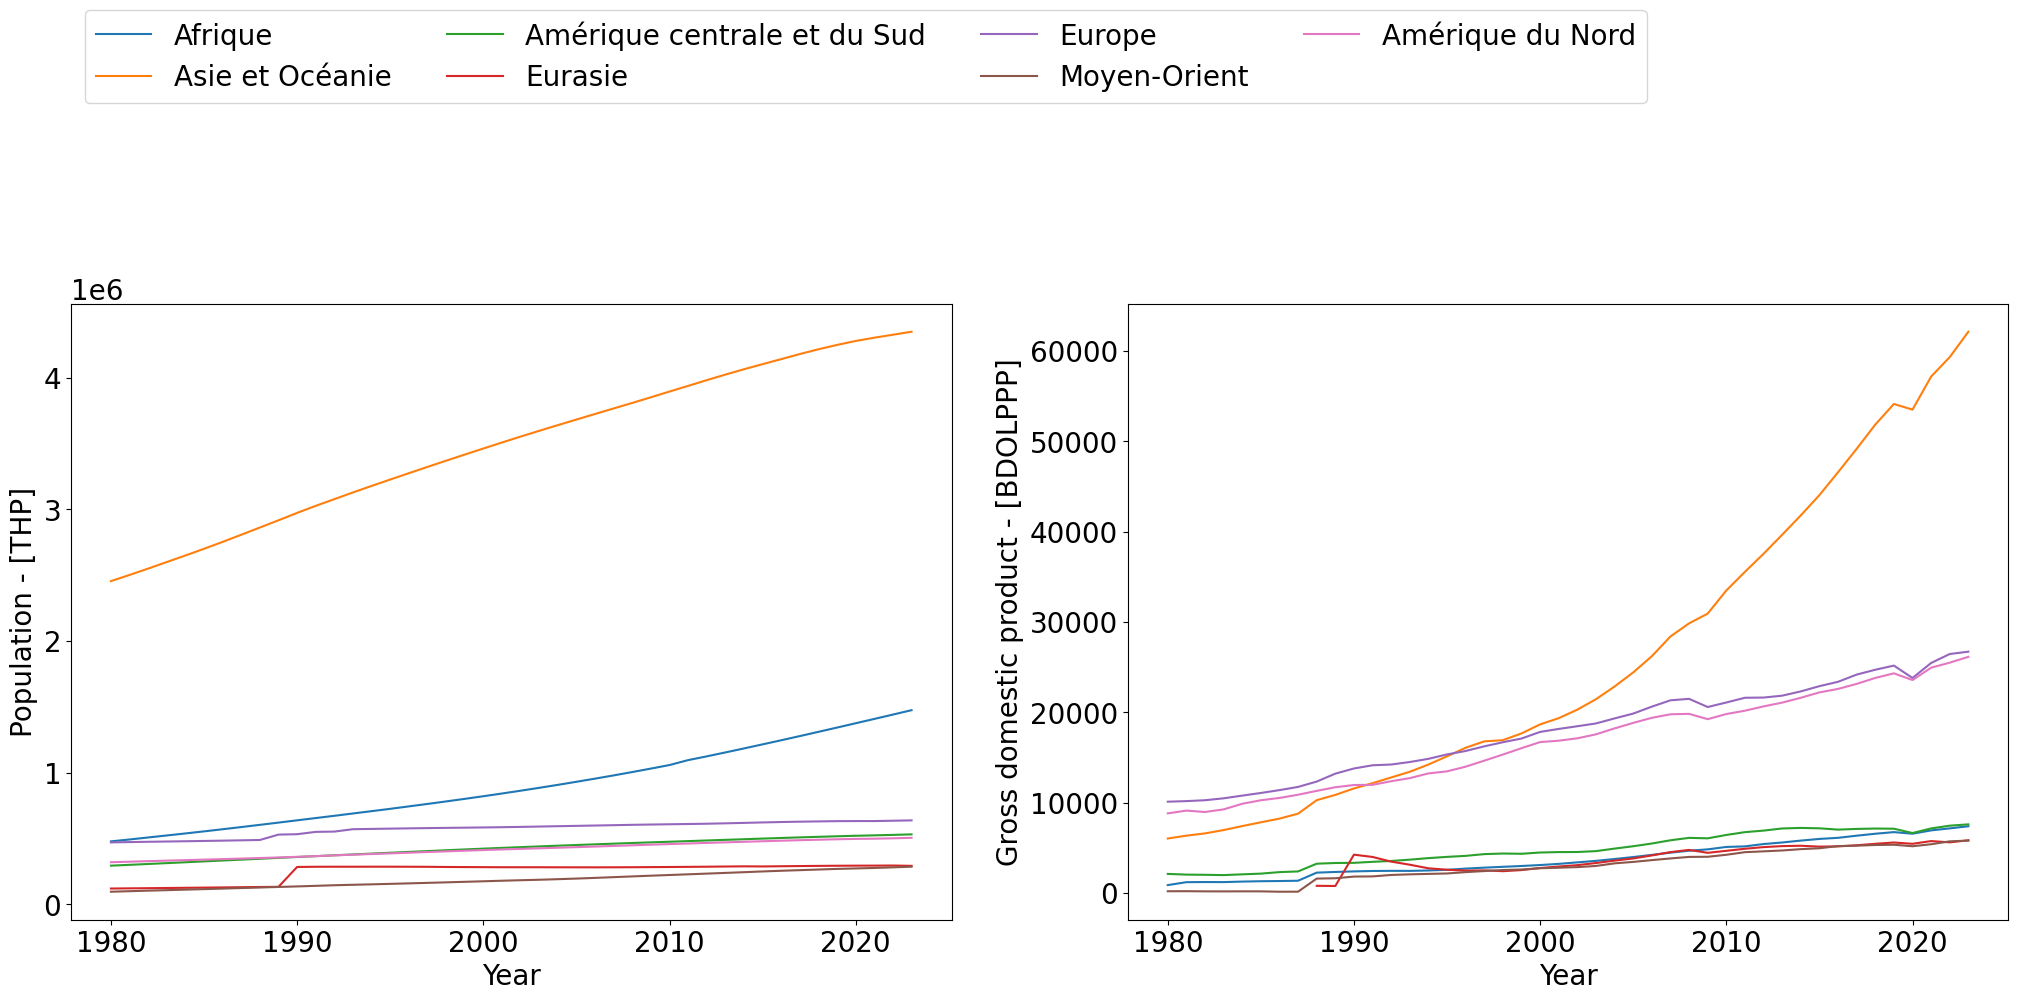

In [138]:
# Commençons par les données de population e de PIB
data_ses = api.get_data_by_id(["4701","4702"])
plot_by_region_and_type(data_ses,kind="line")


Et maintenant des graphiques un peu plus propres

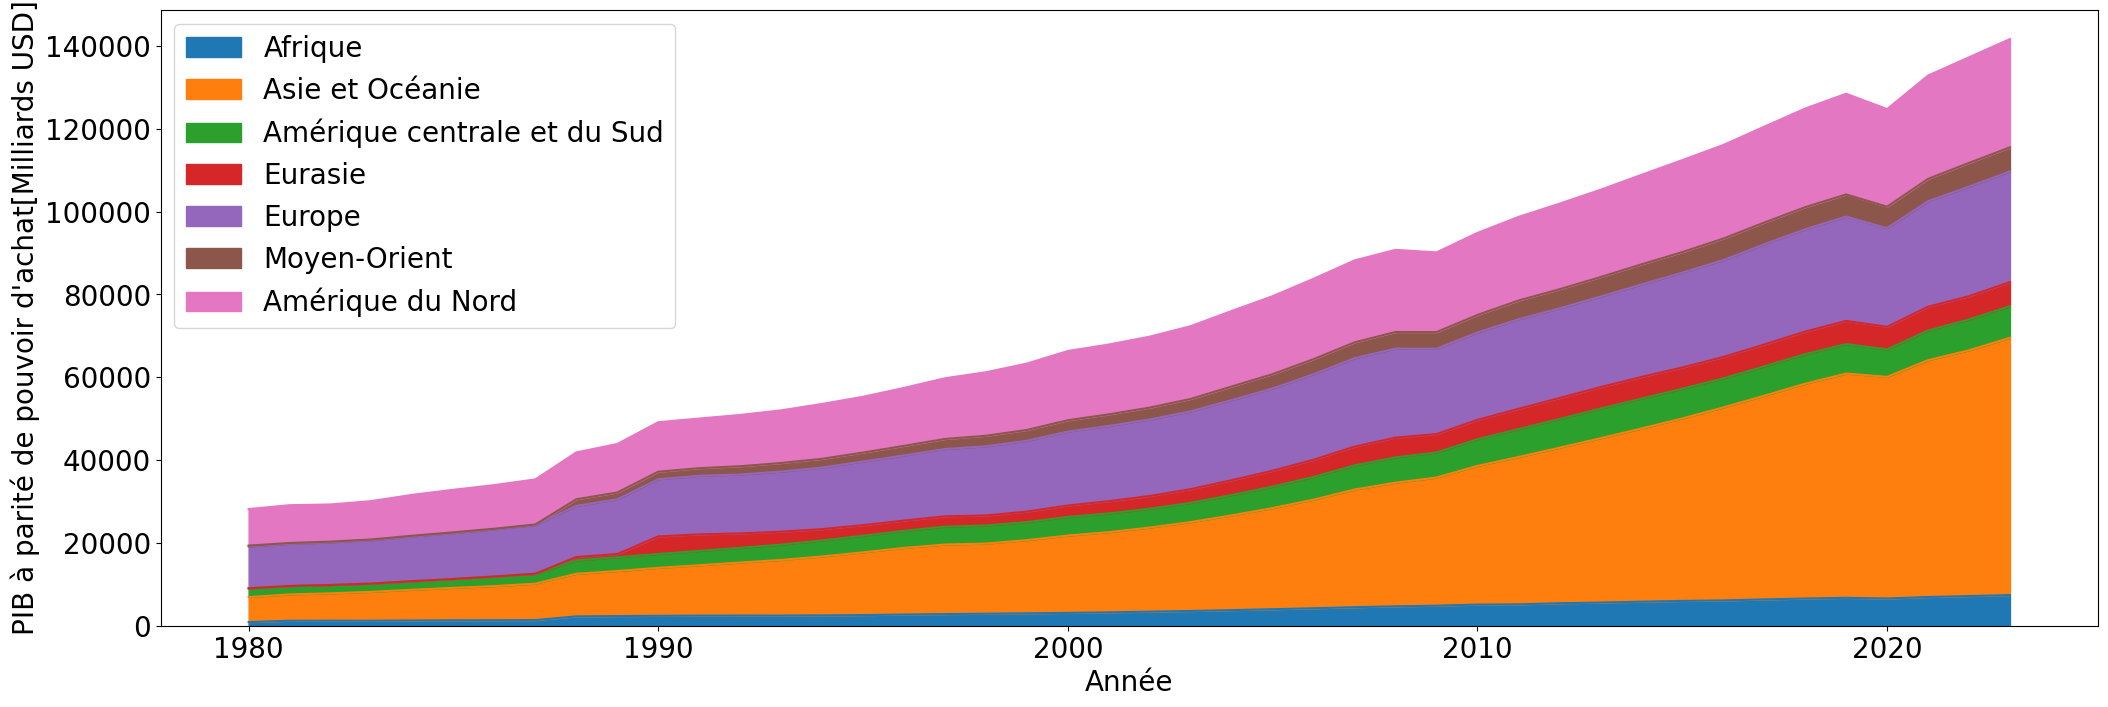

In [139]:

data_gdp = data_ses.loc[data_ses["productName"]=="Gross domestic product"]
data_gdp = data_gdp.sort_values(by=["countryRegionName","period"])
data_gdp = data_gdp.pivot(columns="countryRegionName",index="period",values="value")
data_gdp = data_gdp.rename(columns=country_dict_francais)
ax2=data_gdp.plot(kind="area",xlabel="Année",ylabel="PIB à parité de pouvoir d'achat[Milliards USD]")
ax2.legend(title="")
#ax2.legend(ax2.get_legend)


POpulation mondiale. L'Asie comporte une beaucoup plus grande portion de lapopulation que du PIB

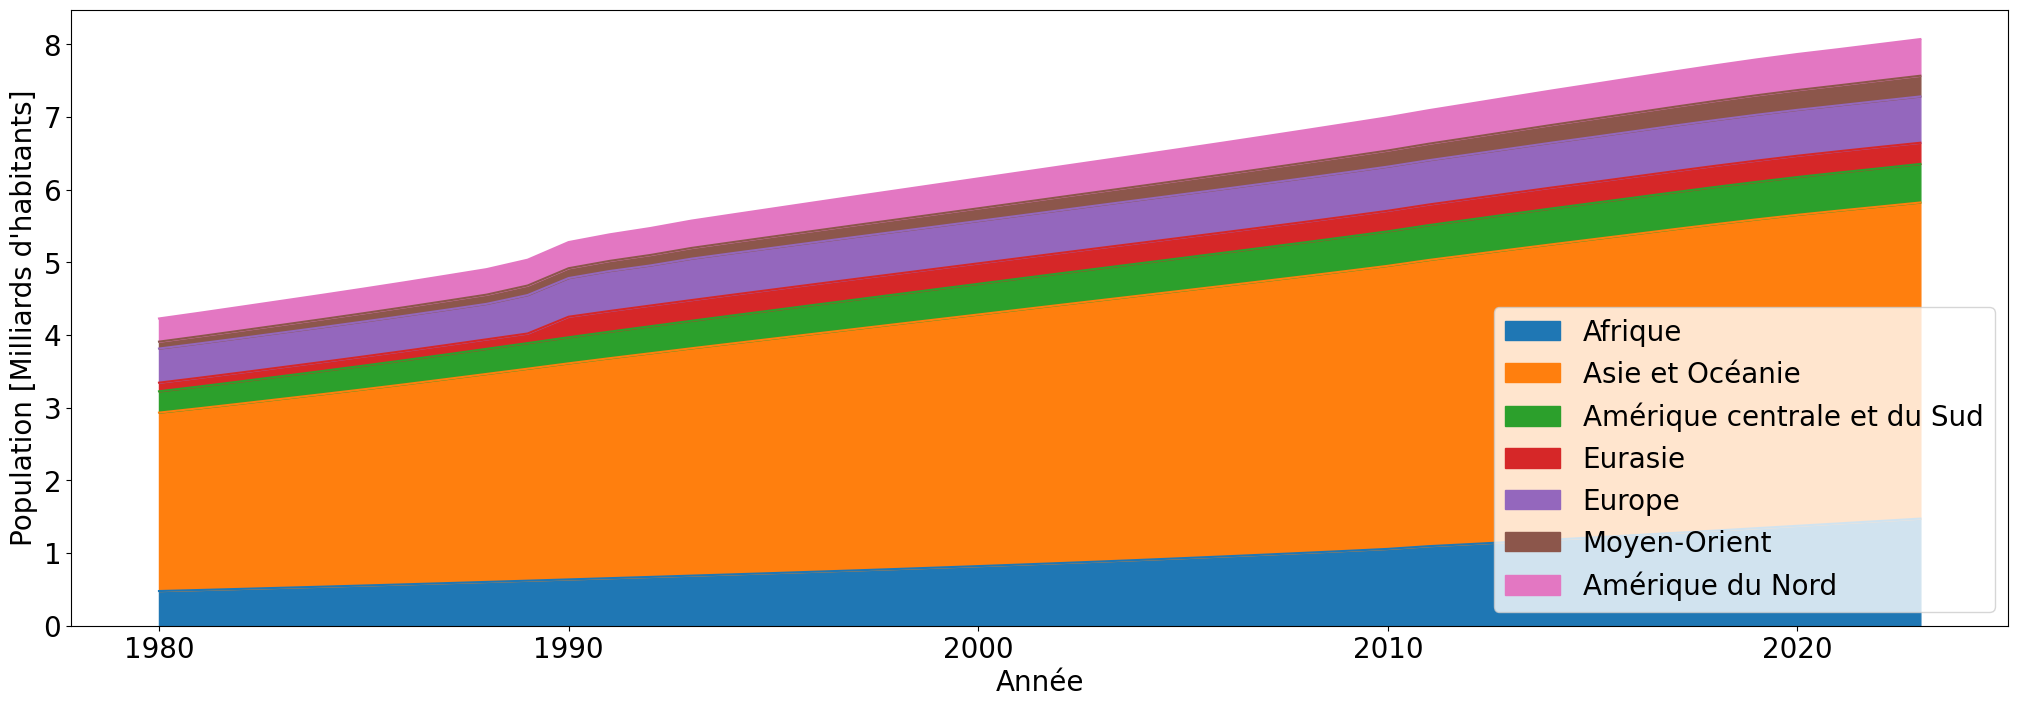

In [142]:
data_pop = data_ses.loc[data_ses["productName"]=="Population"]
data_pop = data_pop.sort_values(by=["countryRegionName","period"])
population = data_pop.pivot(index="period",values="value",columns="countryRegionName")
population = population.rename(columns=country_dict_francais)
population = population / 1000000
ax3=population.plot(kind="area",xlabel="Année",ylabel="Population [Milliards d'habitants]")
ax3.legend(title="")


Bref regard sur le PIB par habitant. L'Asie a fait un rattrapage énorme. Le Moyen-Orient aussi

In [ ]:
population = population *1000000000
GDP_per_capita = data_gdp * 1000000000/population

GDP_per_capita_plot = GDP_per_capita.loc[GDP_per_capita.index.isin(bar_plot_year_list)]

ax4=GDP_per_capita_plot.plot(kind="bar",xlabel="Année",ylabel="PIB par habitant à PPA [USD]")
ax4.legend(title="")

## Énergie primaire consommée par continent et type de carburant
 Les données sur l'énergie consommées sont disponible sous forme d'énergie primaire totale mais aussi par type de carburant

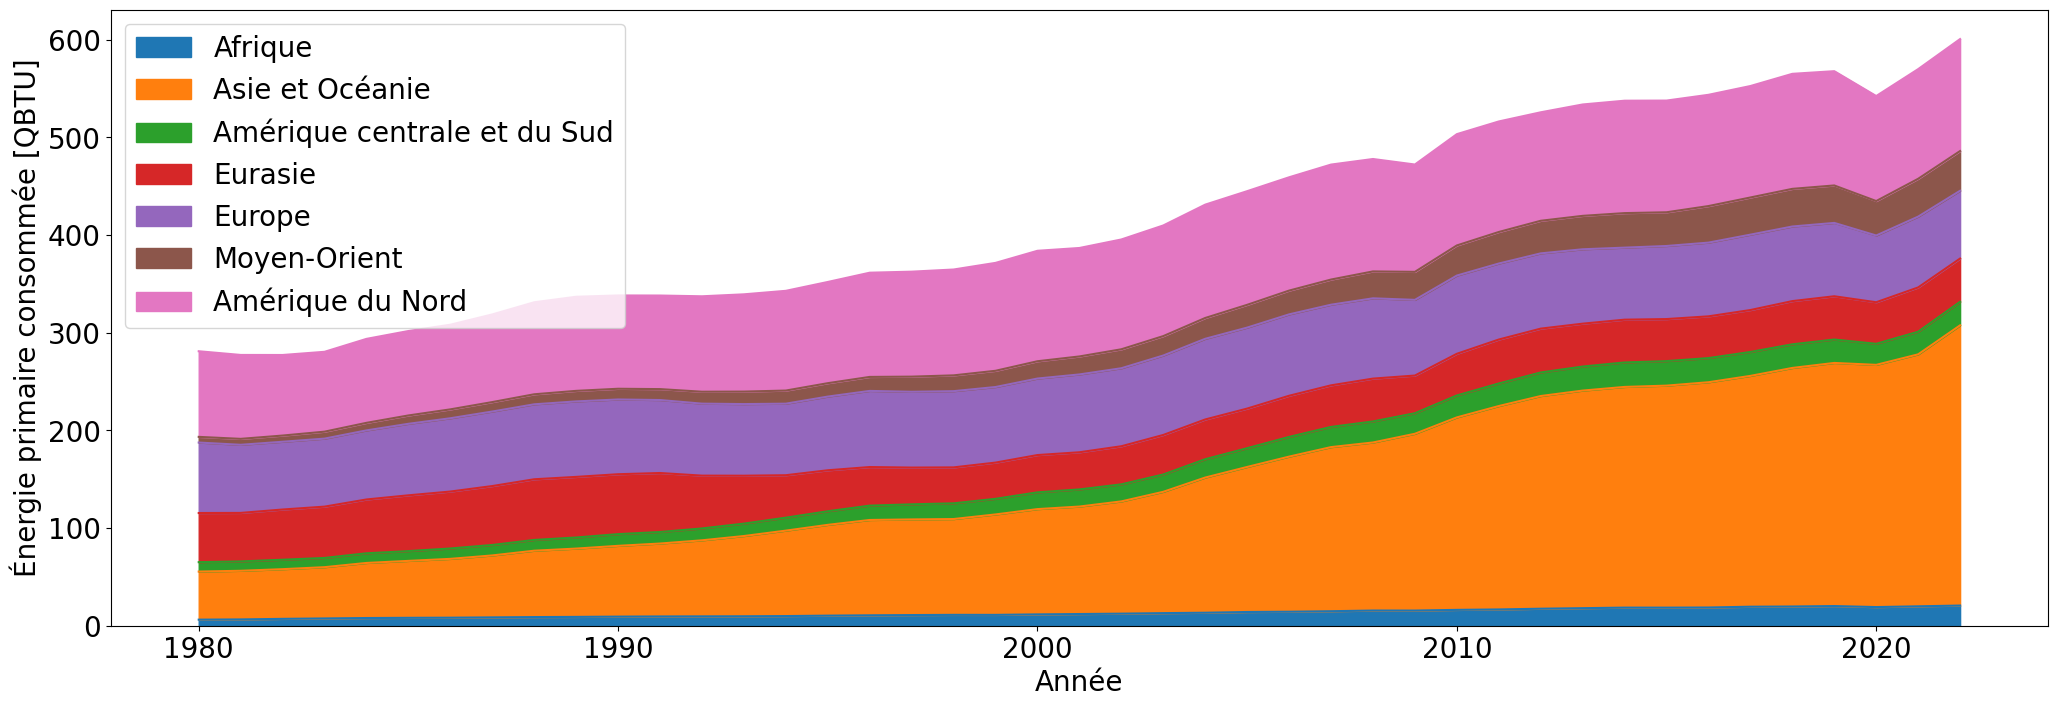

In [112]:
data_energy = api.get_data_by_id(["44","4411","4413","4415","4417","4418"],"QBTU")
data_energy_consumption = data_energy.loc[data_energy["activityName"]=="Consumption"]
data_primary_energy = data_energy.loc[(data_energy["productName"]=="Primary energy") & (data_energy["activityName"]=="Consumption")]
data_primary_energy=data_primary_energy.sort_values(by=["countryRegionName","period"])
data_primary_energy_pivot = data_primary_energy.pivot(index="period",columns="countryRegionName",values="value")
data_primary_energy_pivot = data_primary_energy_pivot.rename(columns=country_dict_francais)
ax5=data_primary_energy_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire consommée [QBTU]")


ax5.legend(title="")

#blue_patch = patches.Patch(color='blue', label='C')
#ax1.legend({"Afrique","Asie et Océanie","Amérique centrale et du Sud","Eurasie","Europe","Moyen-Orient","Amérique du Nord"})
#plot_by_region_and_type(data_energy_consumption,kind="area")


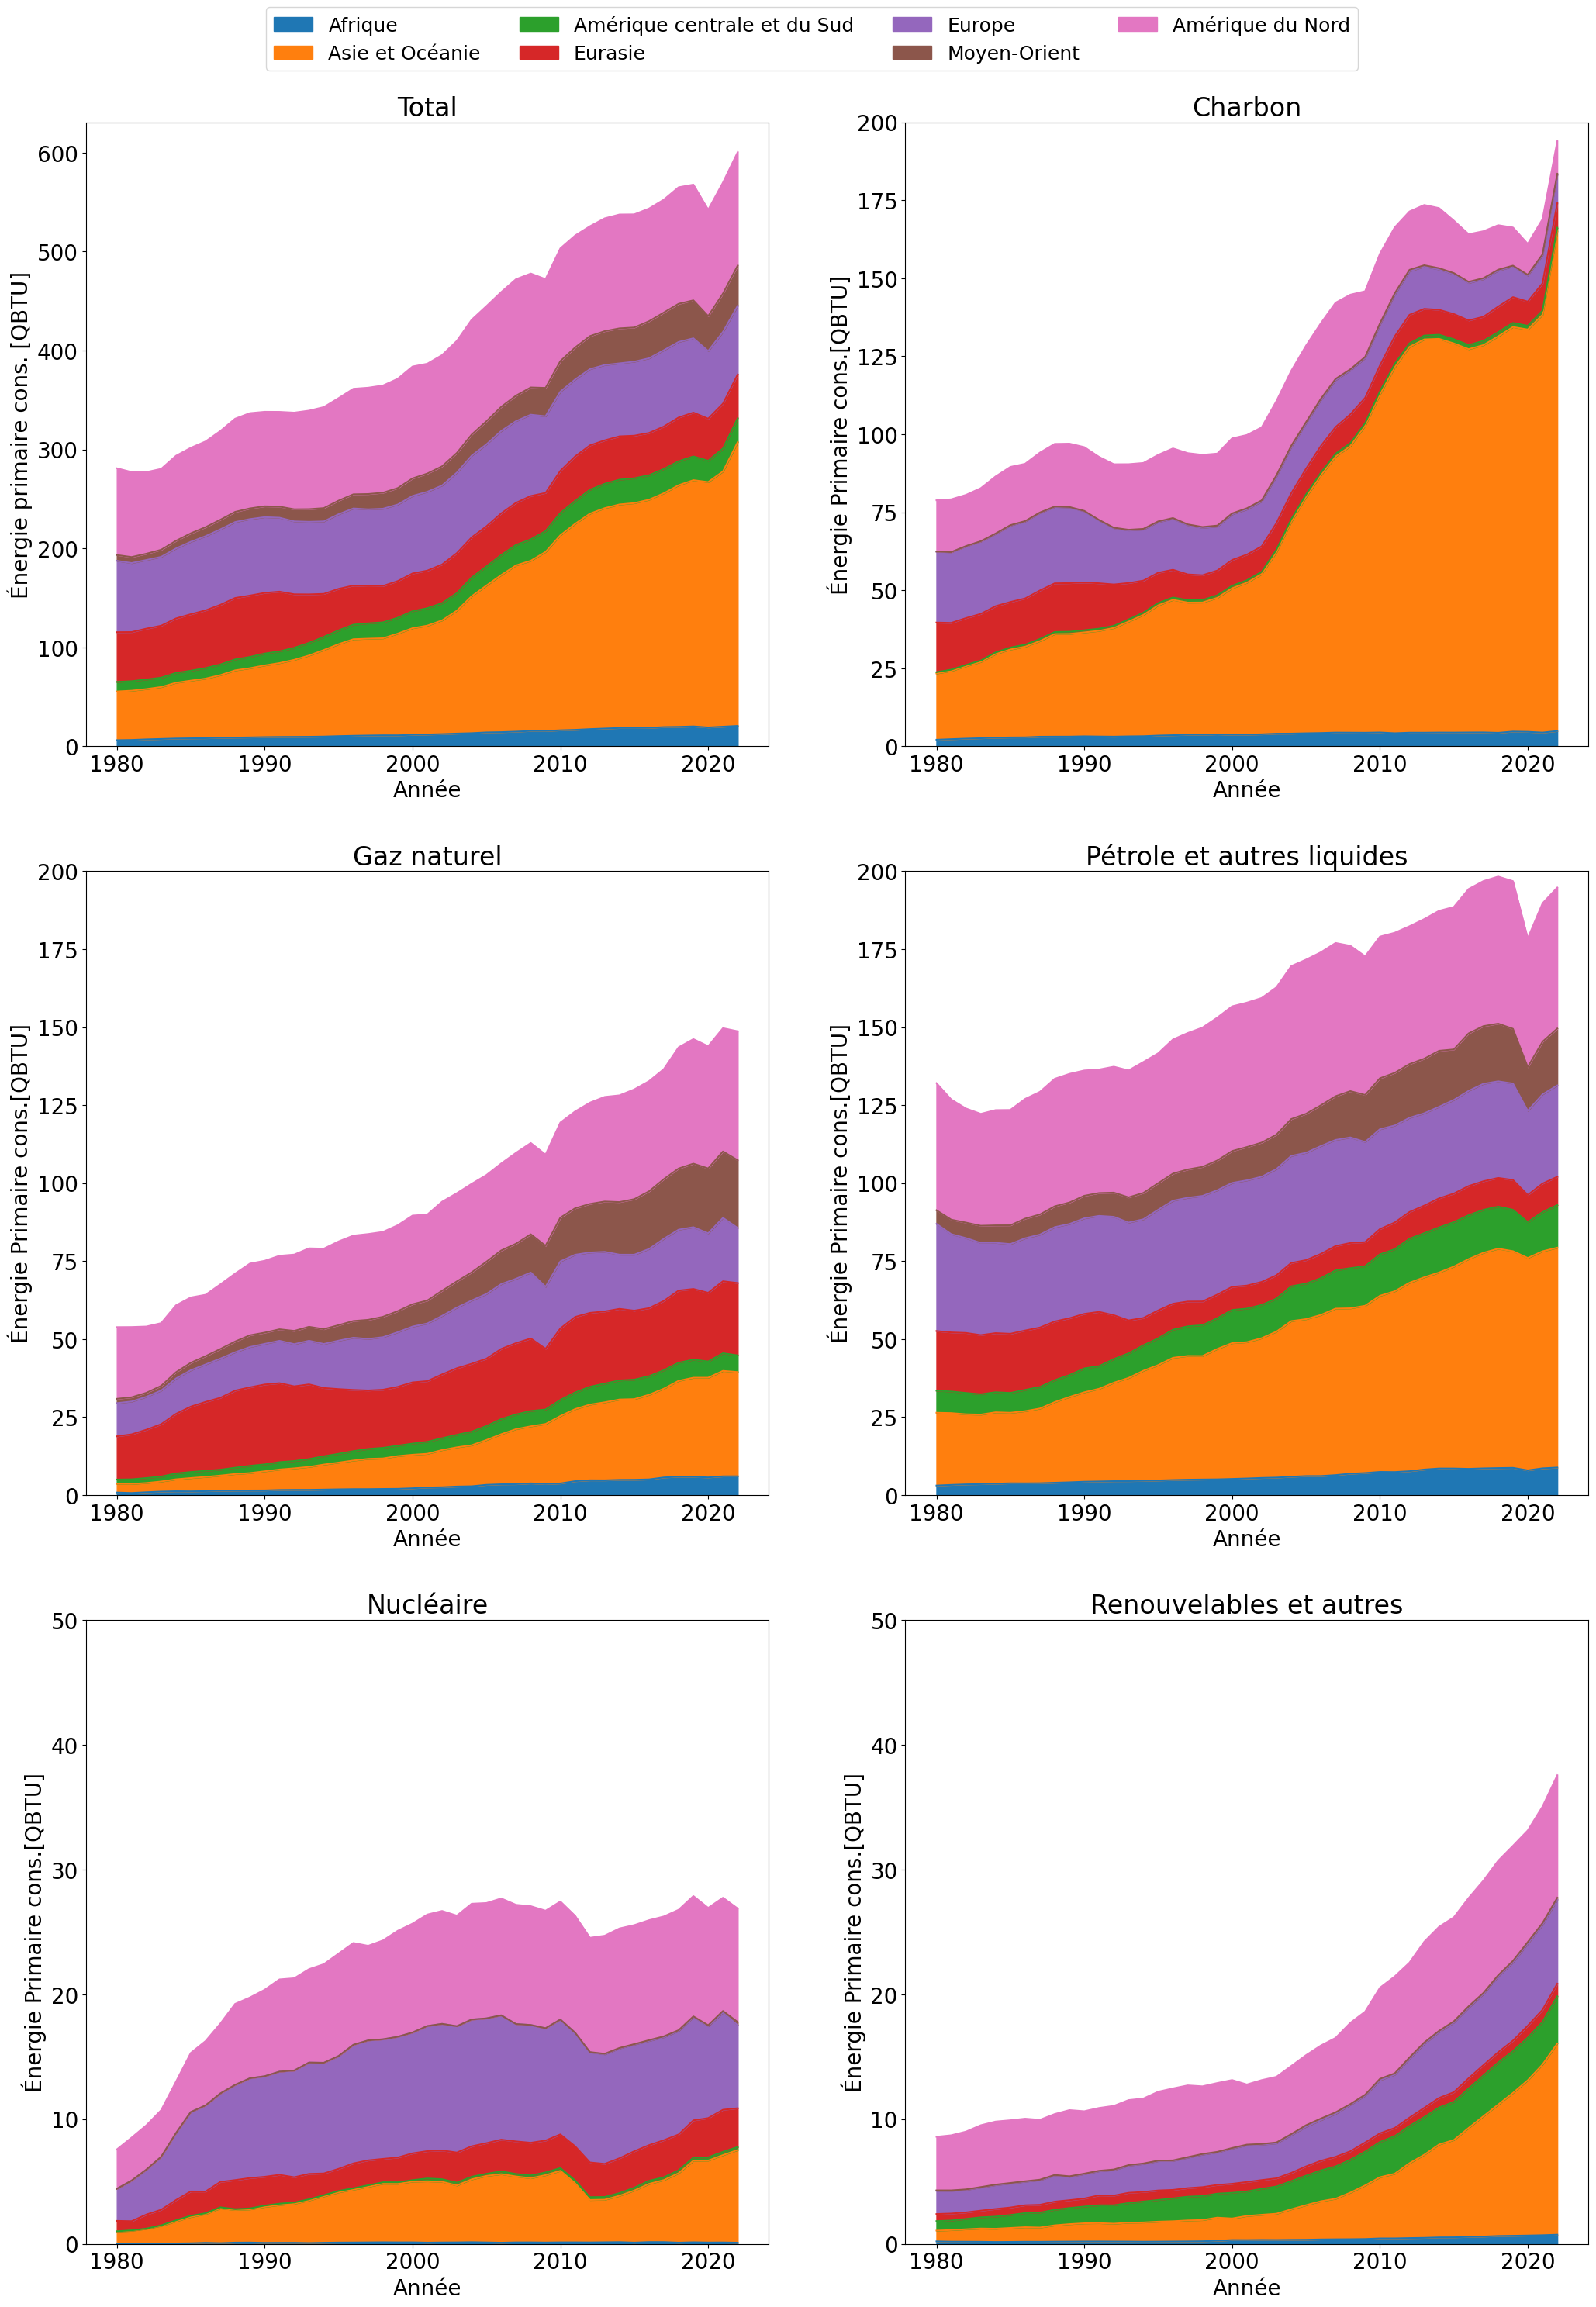

In [113]:

# Faisons un graphique de la consommation d'énergie par type d'énergie
fig_cons_par_produit = plt.figure(figsize=[25,24])
ax11=plt.subplot(3,2,1)
data_primary_energy_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax11)
ax11.legend(title="",loc="upper left",ncols=4,bbox_to_anchor=(0.25,1.2),fontsize=18)
plt.title("Total")
ax12=plt.subplot(3,2,2)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Coal") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax12,ylim=[0,200])
ax12.get_legend().remove()
plt.title("Charbon")
# Gaz naturel
ax13=plt.subplot(3,2,3)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Natural gas") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax13,ylim=[0,200])
plt.title("Gaz naturel")
ax13.get_legend().remove()
# Pétrole
ax14=plt.subplot(3,2,4)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Petroleum and other liquids") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax14,ylim=[0,200])
plt.title("Pétrole et autres liquides")
ax14.get_legend().remove()
# Nucléaire
ax15=plt.subplot(3,2,5)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Nuclear") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax15,ylim=[0,50])
plt.title("Nucléaire")
ax15.get_legend().remove()
# Renouvelables
ax16=plt.subplot(3,2,6)
data_coal_consumption = data_energy.loc[(data_energy["productName"]=="Renewables and other") & (data_energy["activityName"]=="Consumption")]
data_coal_consumption = data_coal_consumption.sort_values(by=["countryRegionName","period"])
data_coal_consumption_pivot = data_coal_consumption.pivot(columns="countryRegionName",index="period",values="value")
data_coal_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie Primaire cons.[QBTU]",ax=ax16,ylim=[0,50])
plt.title("Renouvelables et autres")
ax16.get_legend().remove()
fig_cons_par_produit.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)

## Distribution de l'énergie primaire et de la population par continent
Regardons à quel point l'énergie est également distribué entre les différents continents par rapport à la population. Deux manières de le regarder: pourcentage et consommation. Pourcentage etst plus visuel

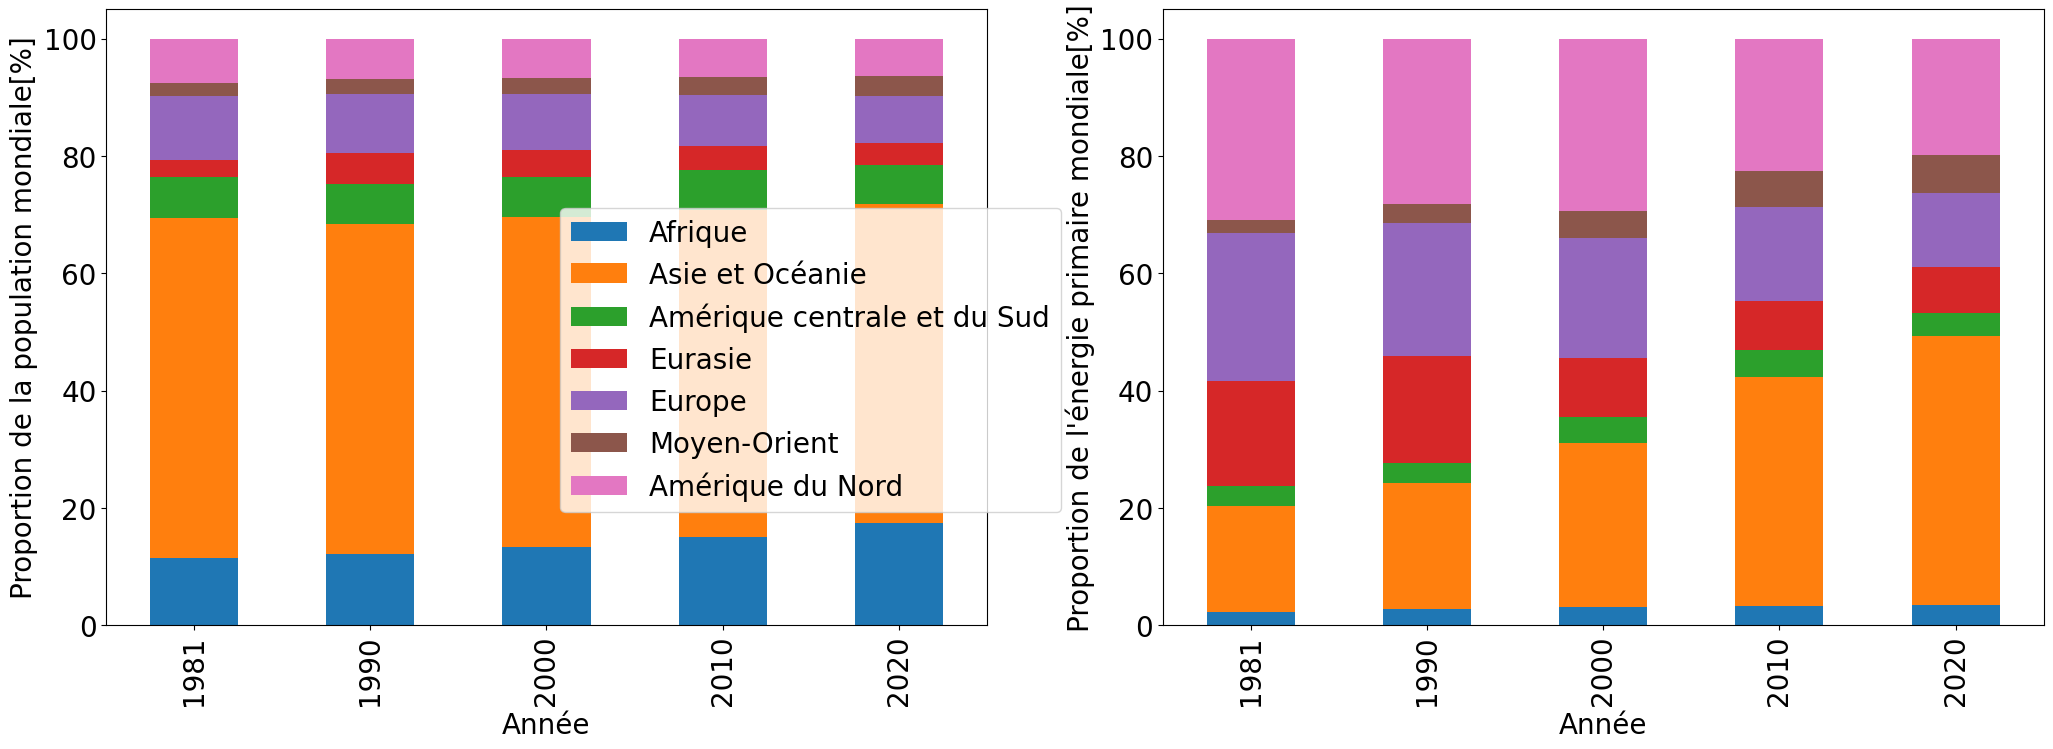

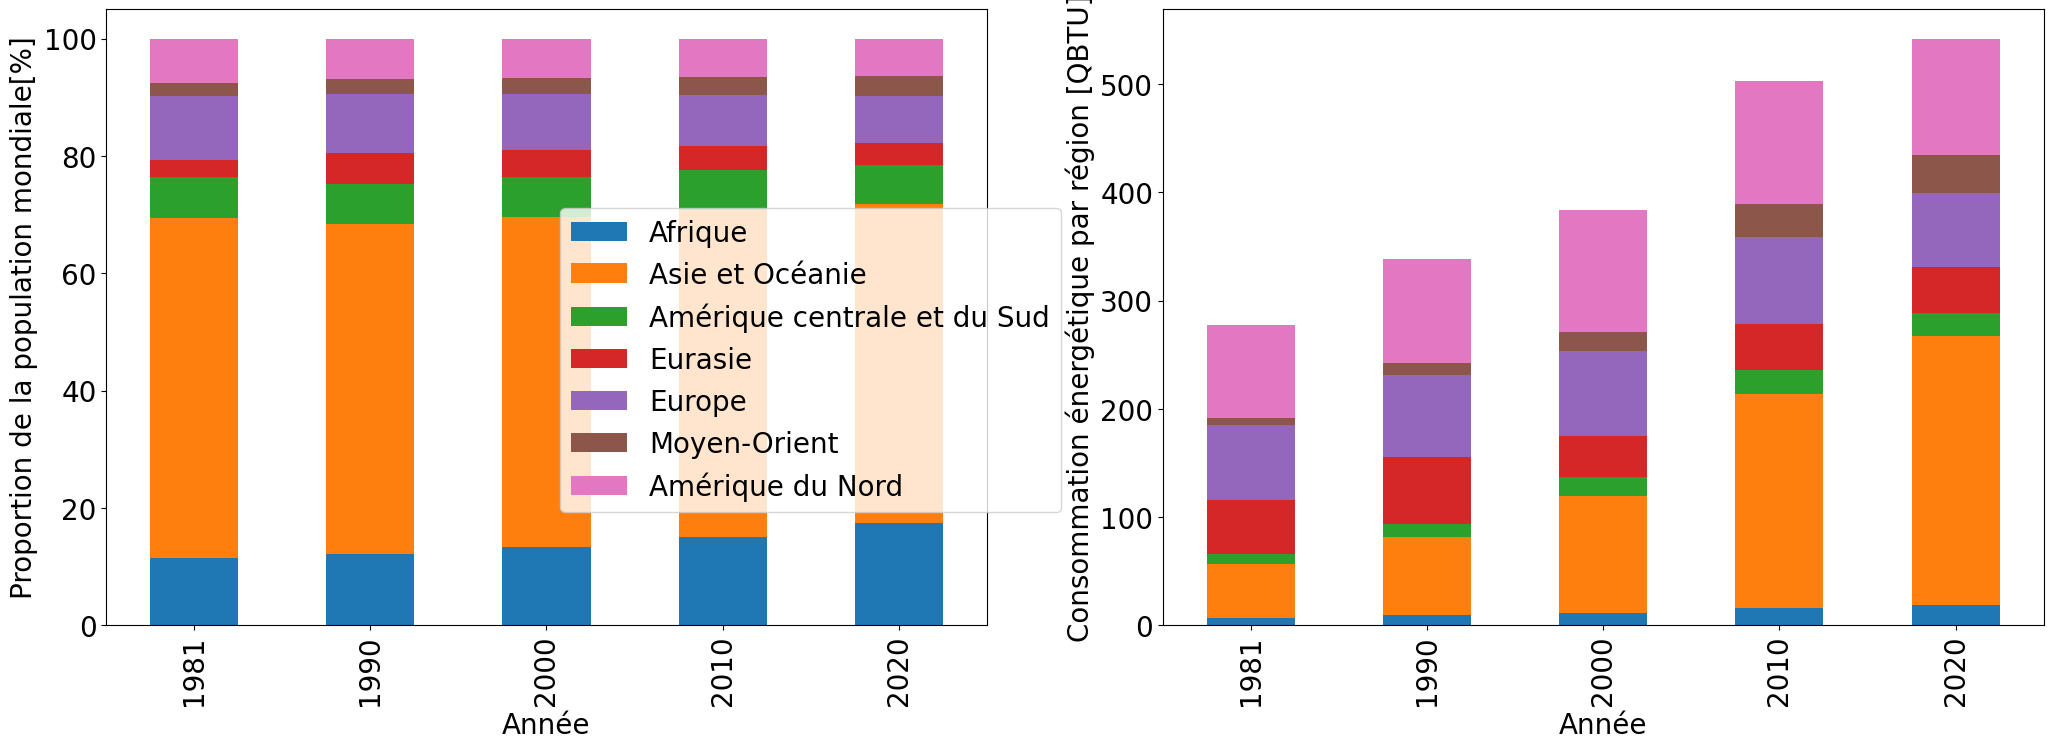

In [114]:
population_totale = population["Afrique"]+population["Amérique centrale et du Sud"]+population["Amérique du Nord"]+population["Asie et Océanie"]+population["Eurasie"]+population["Europe"]+population["Moyen-Orient"]
population_prop = pd.DataFrame()
population_prop["Afrique"] = population["Afrique"] /population_totale *100
population_prop["Asie et Océanie"]=population["Asie et Océanie"]/population_totale *100
population_prop["Amérique centrale et du Sud"]=population["Amérique centrale et du Sud"]/population_totale *100
population_prop["Eurasie"]=population["Eurasie"]/population_totale *100
population_prop["Europe"]=population["Europe"]/population_totale *100
population_prop["Moyen-Orient"]=population["Moyen-Orient"]/population_totale *100
population_prop["Amérique du Nord"]=population["Amérique du Nord"]/population_totale *100
population_prop_plot = population_prop.loc[population_prop.index.isin(bar_plot_year_list)]


primary_energy_total = data_primary_energy_pivot["Afrique"]+data_primary_energy_pivot["Amérique centrale et du Sud"]+data_primary_energy_pivot["Amérique du Nord"]+data_primary_energy_pivot["Asie et Océanie"]+data_primary_energy_pivot["Eurasie"]+data_primary_energy_pivot["Europe"]+data_primary_energy_pivot["Moyen-Orient"]
primary_energy_prop = pd.DataFrame()
primary_energy_prop["Afrique"] = data_primary_energy_pivot["Afrique"] /primary_energy_total *100
primary_energy_prop["Asie et Océanie"]=data_primary_energy_pivot["Asie et Océanie"]/primary_energy_total *100
primary_energy_prop["Amérique centrale et du Sud"]=data_primary_energy_pivot["Amérique centrale et du Sud"]/primary_energy_total *100
primary_energy_prop["Eurasie"]=data_primary_energy_pivot["Eurasie"]/primary_energy_total *100
primary_energy_prop["Europe"]=data_primary_energy_pivot["Europe"]/primary_energy_total *100
primary_energy_prop["Moyen-Orient"]=data_primary_energy_pivot["Moyen-Orient"]/primary_energy_total *100
primary_energy_prop["Amérique du Nord"]=data_primary_energy_pivot["Amérique du Nord"]/primary_energy_total *100
primary_energy_prop_plot = primary_energy_prop.loc[primary_energy_prop.index.isin(bar_plot_year_list)]

# Proportion
ax7=plt.subplot(1,2,1)
population_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de la population mondiale[%]",stacked=True,ax=ax7)

ax8=plt.subplot(1,2,2)
primary_energy_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de l'énergie primaire mondiale[%]",stacked=True,ax=ax8)
ax7.legend(bbox_to_anchor=(0.5 , 0.7))
ax8.get_legend().remove()
plt.figure()
# total of energy
ax9=plt.subplot(1,2,1)
population_prop_plot.plot(kind="bar",xlabel="Année",ylabel="Proportion de la population mondiale[%]",stacked=True,ax=ax9)
data_primary_energy_pivot_bar_plot = data_primary_energy_pivot.loc[data_primary_energy_pivot.index.isin(bar_plot_year_list)]
ax10=plt.subplot(1,2,2)
data_primary_energy_pivot_bar_plot.plot(kind="bar",xlabel="Année",ylabel="Consommation énergétique par région [QBTU]",stacked=True,ax=ax10)
ax9.legend(bbox_to_anchor=(0.5 , 0.7))
ax10.get_legend().remove()


## Mix énergétique Mondial

Ici on va regarder le mix énergétique mondial en termes d'énergie primaire par type de sources

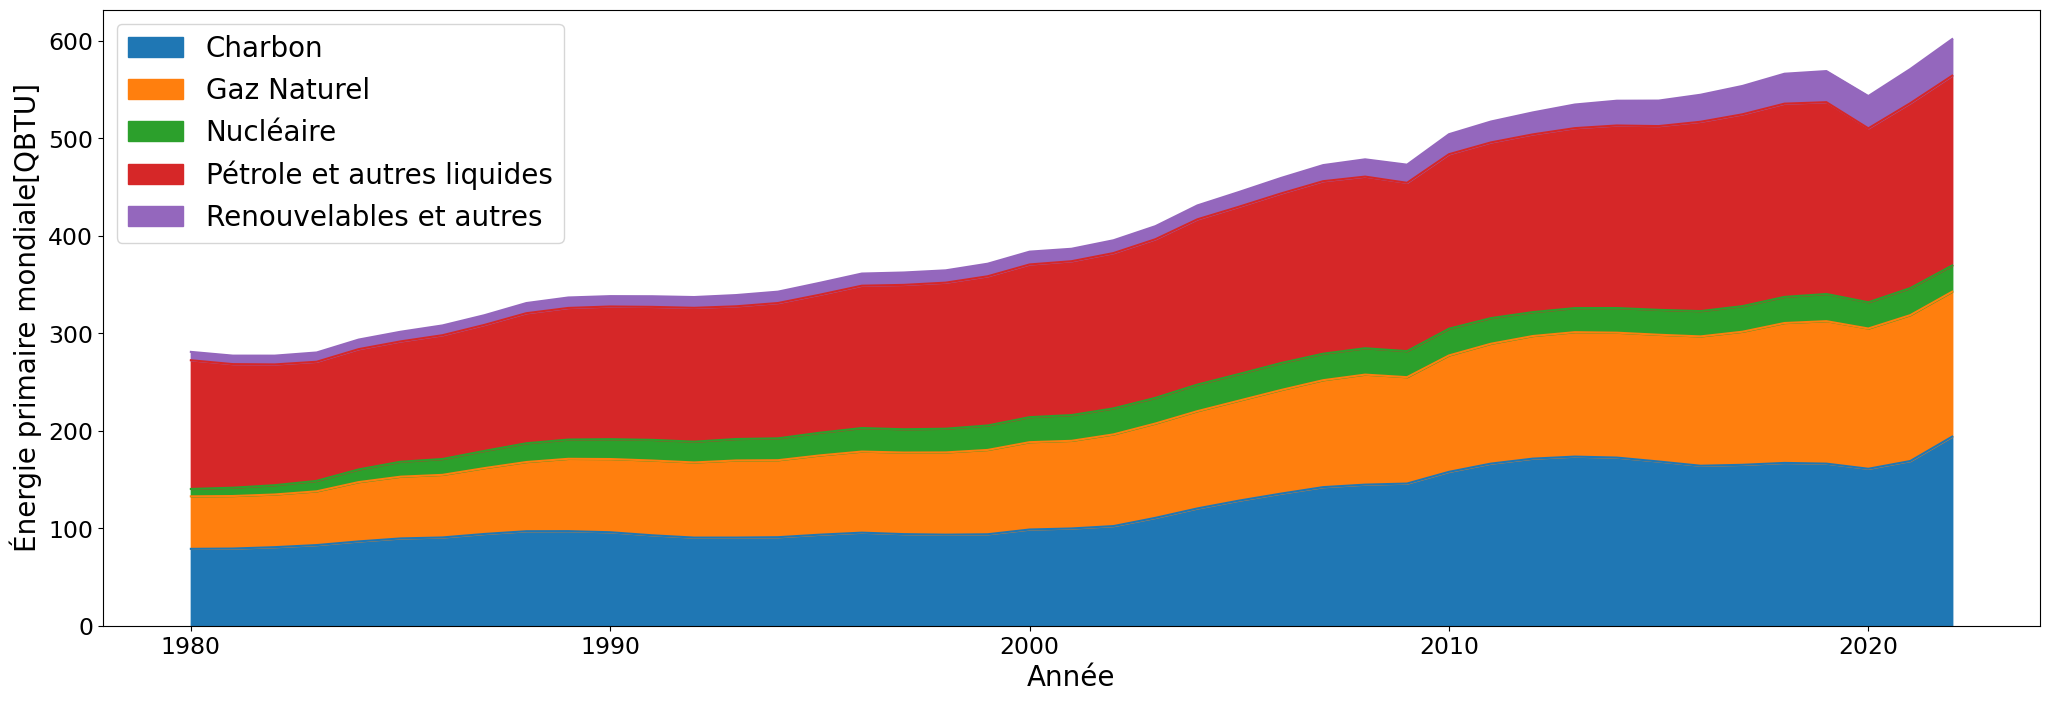

In [115]:
global_energy_consumption = api.get_data_by_id(["4411","4413","4415","4417","4418"],unit="QBTU",regions=region_list_global)
global_energy_consumption = global_energy_consumption.loc[global_energy_consumption["activityName"]=="Consumption"]
global_energy_consumption = global_energy_consumption.sort_values(by=["productName","period"])
global_energy_consumption_pivot = global_energy_consumption.pivot(index="period",columns="productName",values="value")
global_energy_consumption_pivot = global_energy_consumption_pivot.rename(columns=fuel_dict_francais)
ax6=global_energy_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire mondiale[QBTU]",fontsize=17)
ax6.legend(title="")

On constate que le mix énergétique est très différent par continent et que les tendances diffèrent aussi.

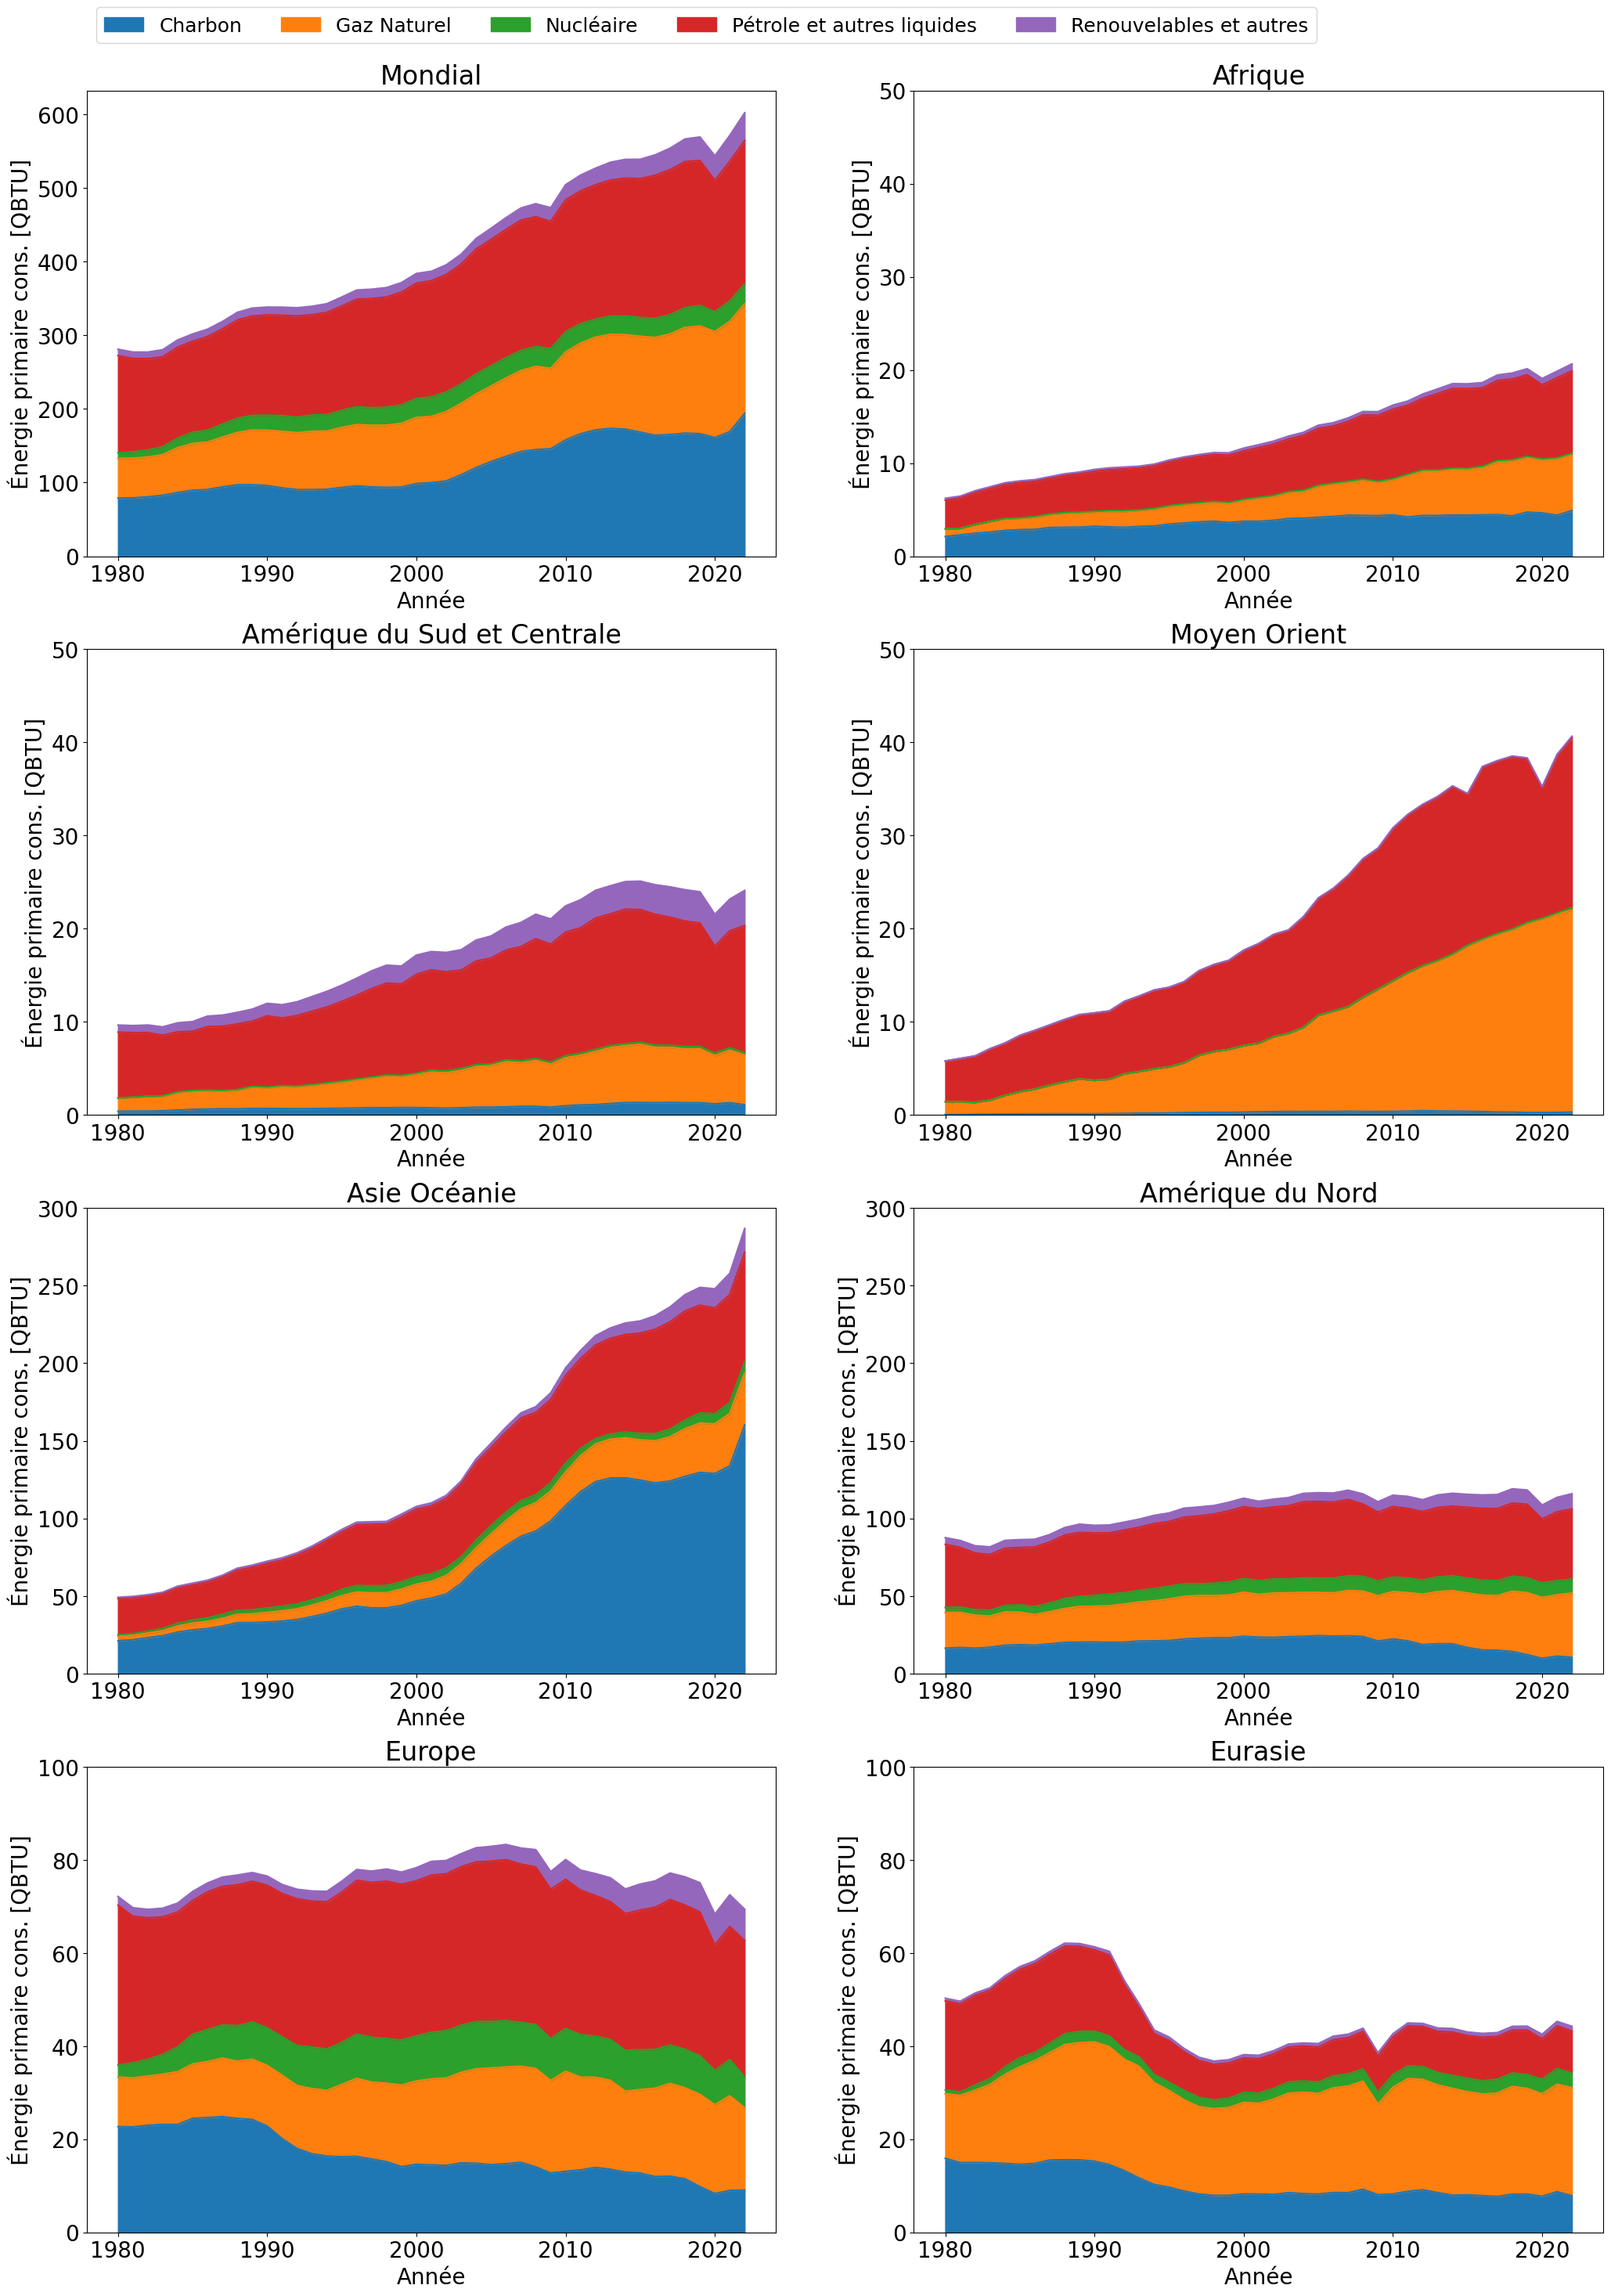

In [116]:
# Regardons le mix énergétique par continent
fig_mix_cont = plt.figure(figsize=[25,24])
ax20=plt.subplot(4,2,1)
global_energy_consumption_pivot.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax20)
ax20.legend(title="",loc="upper left",ncols=5,bbox_to_anchor=(0,1.2),fontsize=18)
plt.title("Mondial")
# Asie Océanie
ax22=plt.subplot(4,2,5)
data_mix_asoc = data_energy.loc[(data_energy["countryRegionId"]=="ASOC") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_asoc = data_mix_asoc.sort_values(by=["productName","period"])
data_mix_asoc = data_mix_asoc.pivot(columns="productName",index="period",values="value")
data_mix_asoc.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax22,ylim=[0,300])
ax22.get_legend().remove()
plt.title("Asie Océanie")
# Afrique
ax21=plt.subplot(4,2,2)
data_mix_africa = data_energy.loc[(data_energy["countryRegionId"]=="AFRC") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_africa = data_mix_africa.sort_values(by=["productName","period"])
data_mix_africa = data_mix_africa.pivot(columns="productName",index="period",values="value")
data_mix_africa.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax21,ylim=[0,50])
ax21.get_legend().remove()
plt.title("Afrique")


["AFRC","ASOC","CSAM","EURA","EURO","MIDE","NOAM"]
# Amérique du sud et centrale
ax23=plt.subplot(4,2,3)
data_mix_csam = data_energy.loc[(data_energy["countryRegionId"]=="CSAM") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_csam = data_mix_csam.sort_values(by=["productName","period"])
data_mix_csam = data_mix_csam.pivot(columns="productName",index="period",values="value")
data_mix_csam.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax23,ylim=[0,50])
ax23.get_legend().remove()
plt.title("Amérique du Sud et Centrale")
# Eurasie
ax24=plt.subplot(4,2,8)
data_mix_eura = data_energy.loc[(data_energy["countryRegionId"]=="EURA") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_eura = data_mix_eura.sort_values(by=["productName","period"])
data_mix_eura = data_mix_eura.pivot(columns="productName",index="period",values="value")
data_mix_eura.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax24,ylim=[0,100])
ax24.get_legend().remove()
plt.title("Eurasie")
# Moyen-Orient
ax25=plt.subplot(4,2,4)
data_mix_mide = data_energy.loc[(data_energy["countryRegionId"]=="MIDE") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_mide = data_mix_mide.sort_values(by=["productName","period"])
data_mix_mide = data_mix_mide.pivot(columns="productName",index="period",values="value")
data_mix_mide.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax25,ylim=[0,50])
ax25.get_legend().remove()
plt.title("Moyen Orient")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)
# Europe
ax26=plt.subplot(4,2,7)
data_mix_euro = data_energy.loc[(data_energy["countryRegionId"]=="EURO") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_euro = data_mix_euro.sort_values(by=["productName","period"])
data_mix_euro = data_mix_euro.pivot(columns="productName",index="period",values="value")
data_mix_euro.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax26,ylim=[0,100])
ax26.get_legend().remove()
plt.title("Europe")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)
# Amérique du nord
ax27=plt.subplot(4,2,6)
data_mix_noam = data_energy.loc[(data_energy["countryRegionId"]=="NOAM") & (data_energy["activityName"]=="Consumption") & (data_energy["productName"]!="Primary energy")]
data_mix_noam = data_mix_noam.sort_values(by=["productName","period"])
data_mix_noam = data_mix_noam.pivot(columns="productName",index="period",values="value")
data_mix_noam.plot(kind="area",xlabel="Année",ylabel="Énergie primaire cons. [QBTU]",ax=ax27,ylim=[0,300])
ax27.get_legend().remove()
plt.title("Amérique du Nord")
fig_mix_cont.subplots_adjust(wspace=0.2, hspace=0.2,top=1.25)


## Analyse des données sur les émissions de GES
On peut aussi importer les données de GES de l'API de l'EIA

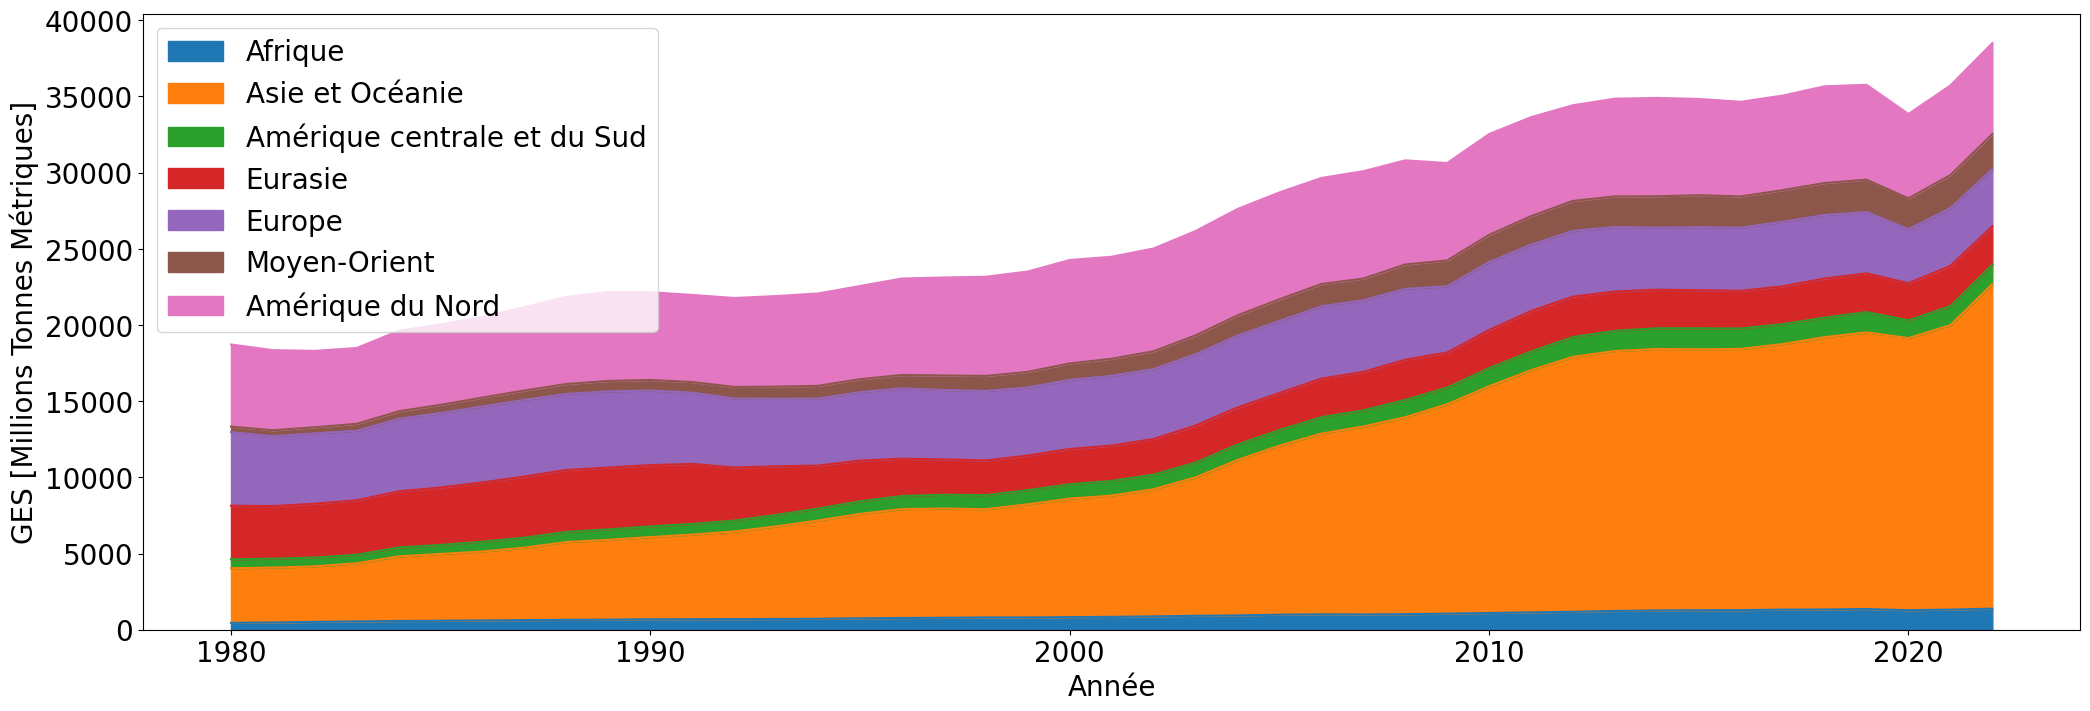

In [117]:
data_emissions = api.get_data_by_id(["4008","4002","4010","4006"])
data_emissions = data_emissions.loc[data_emissions["period"]>1979]
data_emissions_total = data_emissions.loc[data_emissions["productName"]=="CO2 emissions"]
dude = data_emissions_total.index[0]
data_emissions_total_units = data_emissions_total.loc[dude,"unitName"]
data_emissions_total_pivot = data_emissions_total.pivot(index="period",columns="countryRegionName",values="value")
data_emissions_total_pivot = data_emissions_total_pivot.rename(columns=country_dict_francais)
ax30=data_emissions_total_pivot.plot(kind="area",xlabel="Année",ylabel="GES [Millions Tonnes Métriques]")
ax30.legend(title="")

Variation du pourcentage des émissions de GES vs l'énergie primaire montre l'impact disproportionné du charbon sur le bilan carbone du monde et de l'importance de réduire sa consommation

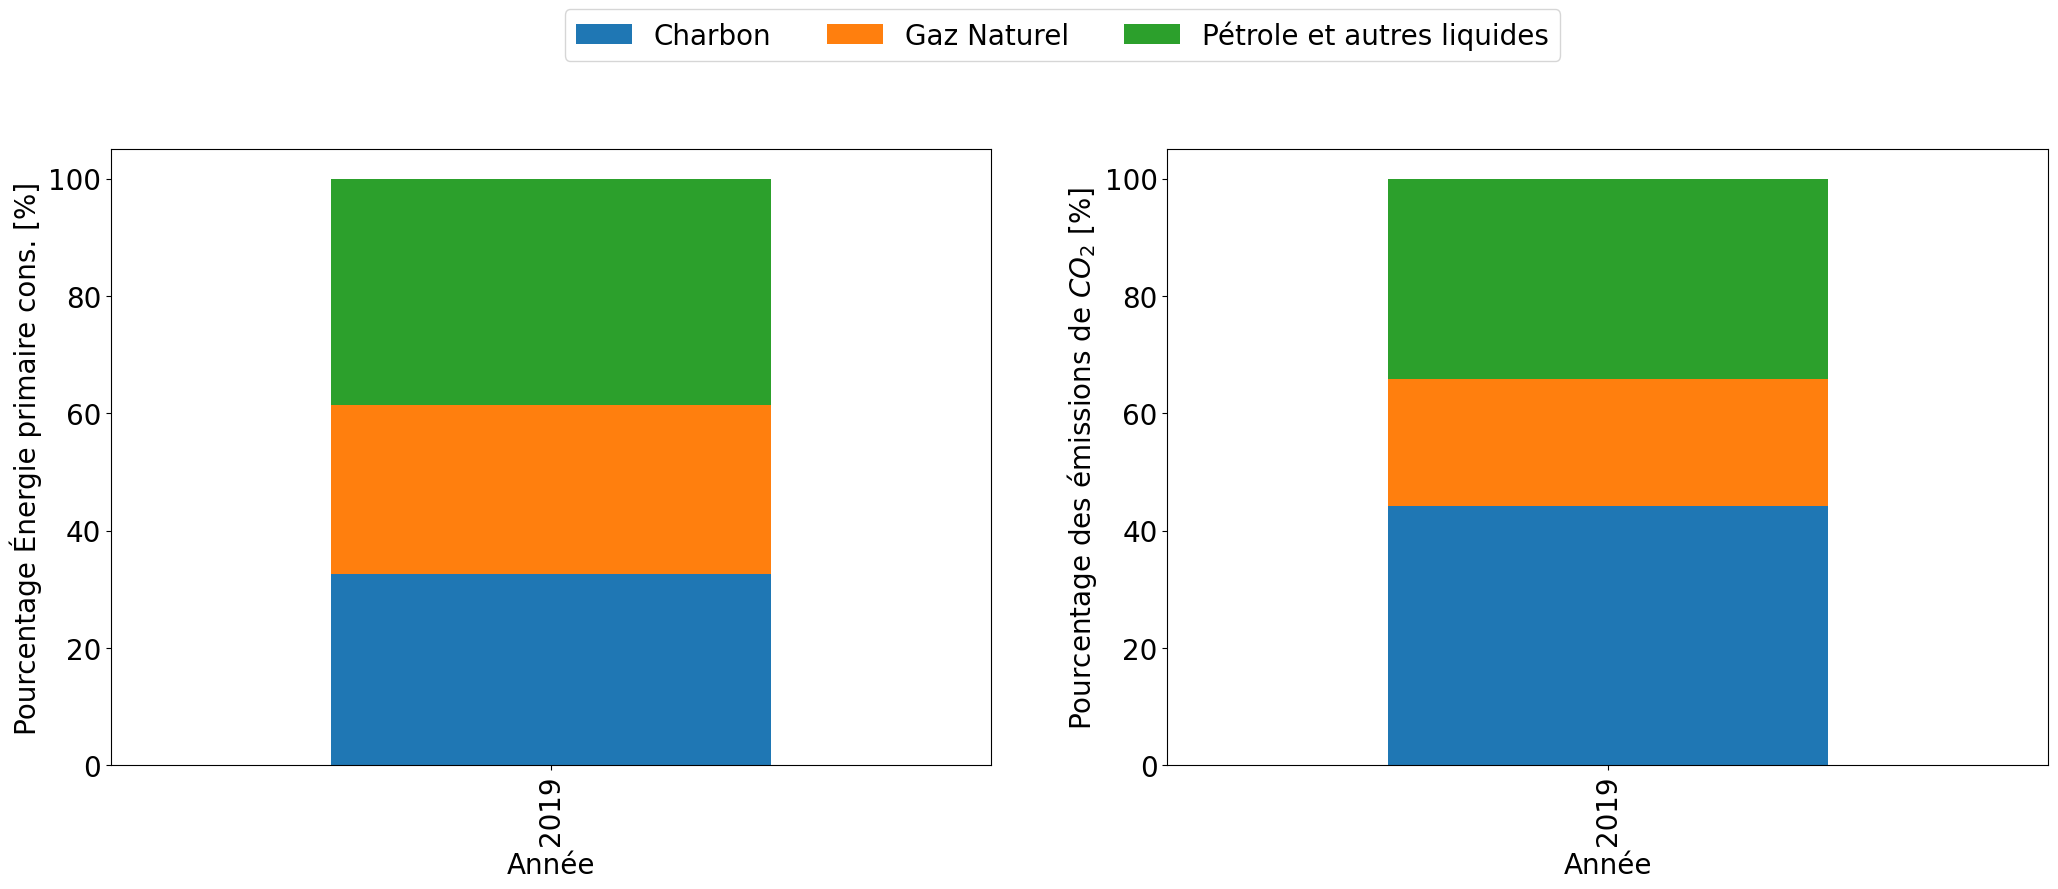

In [118]:
#emissions
world_emissions_by_fuel = api.get_data_by_id(productId=["4002","4010","4006"],regions=region_list_global)
world_emissions_by_fuel = world_emissions_by_fuel.sort_values(by=["productName","period"])
world_emissions_by_fuel = world_emissions_by_fuel.pivot(values="value",index="period",columns = "productName")
emissions_by_fuel_bar_2019 = world_emissions_by_fuel.loc[world_emissions_by_fuel.index==2019]
total_emissions = emissions_by_fuel_bar_2019["Coal and coke"]+emissions_by_fuel_bar_2019["Petroleum and other liquids"]+emissions_by_fuel_bar_2019["Consumed natural gas"]
emissions_by_fuel_bar_2019 = emissions_by_fuel_bar_2019/total_emissions.values[0] * 100

# Energy consumption
global_energy_consumption_pivot_bar_2019 = global_energy_consumption_pivot.loc[global_energy_consumption_pivot.index==2019].drop(columns=["Nucléaire","Renouvelables et autres"])
global_energy_consumption_total_2019 = global_energy_consumption_pivot_bar_2019["Charbon"]+global_energy_consumption_pivot_bar_2019["Gaz Naturel"]+global_energy_consumption_pivot_bar_2019["Pétrole et autres liquides"]
global_energy_consumption_pivot_bar_2019 = global_energy_consumption_pivot_bar_2019/global_energy_consumption_total_2019.values[0] *100
#plot shit
fig_energy_emissions = plt.figure(figsize=[25,8])
ax28 = plt.subplot(1,2,2)
emissions_by_fuel_bar_2019.plot(kind="bar",stacked=True,ax=ax28,xlabel ="Année",ylabel="Pourcentage des émissions de $CO_2$ [%]")
ax28.get_legend().remove()
ax29 = plt.subplot(1,2,1)
global_energy_consumption_pivot_bar_2019.plot(kind="bar",stacked=True,ax=ax29,xlabel ="Année",ylabel="Pourcentage Énergie primaire cons. [%]")
ax29.legend(loc="upper left",bbox_to_anchor=(0.5,1.25),title="",ncols=3)

Distribution des émissions historiques. L'Asie domine largement lorsqu'on regarde jusqu'en 1980. À voir avant ça

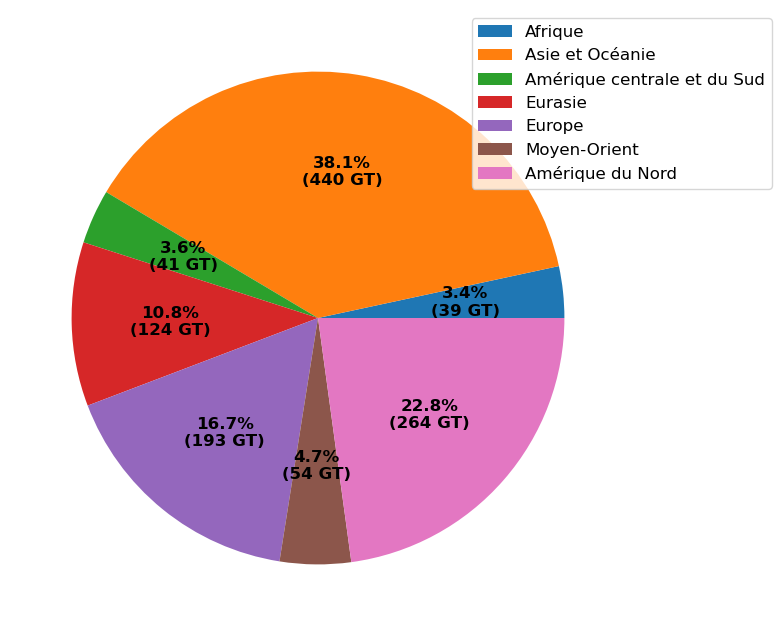

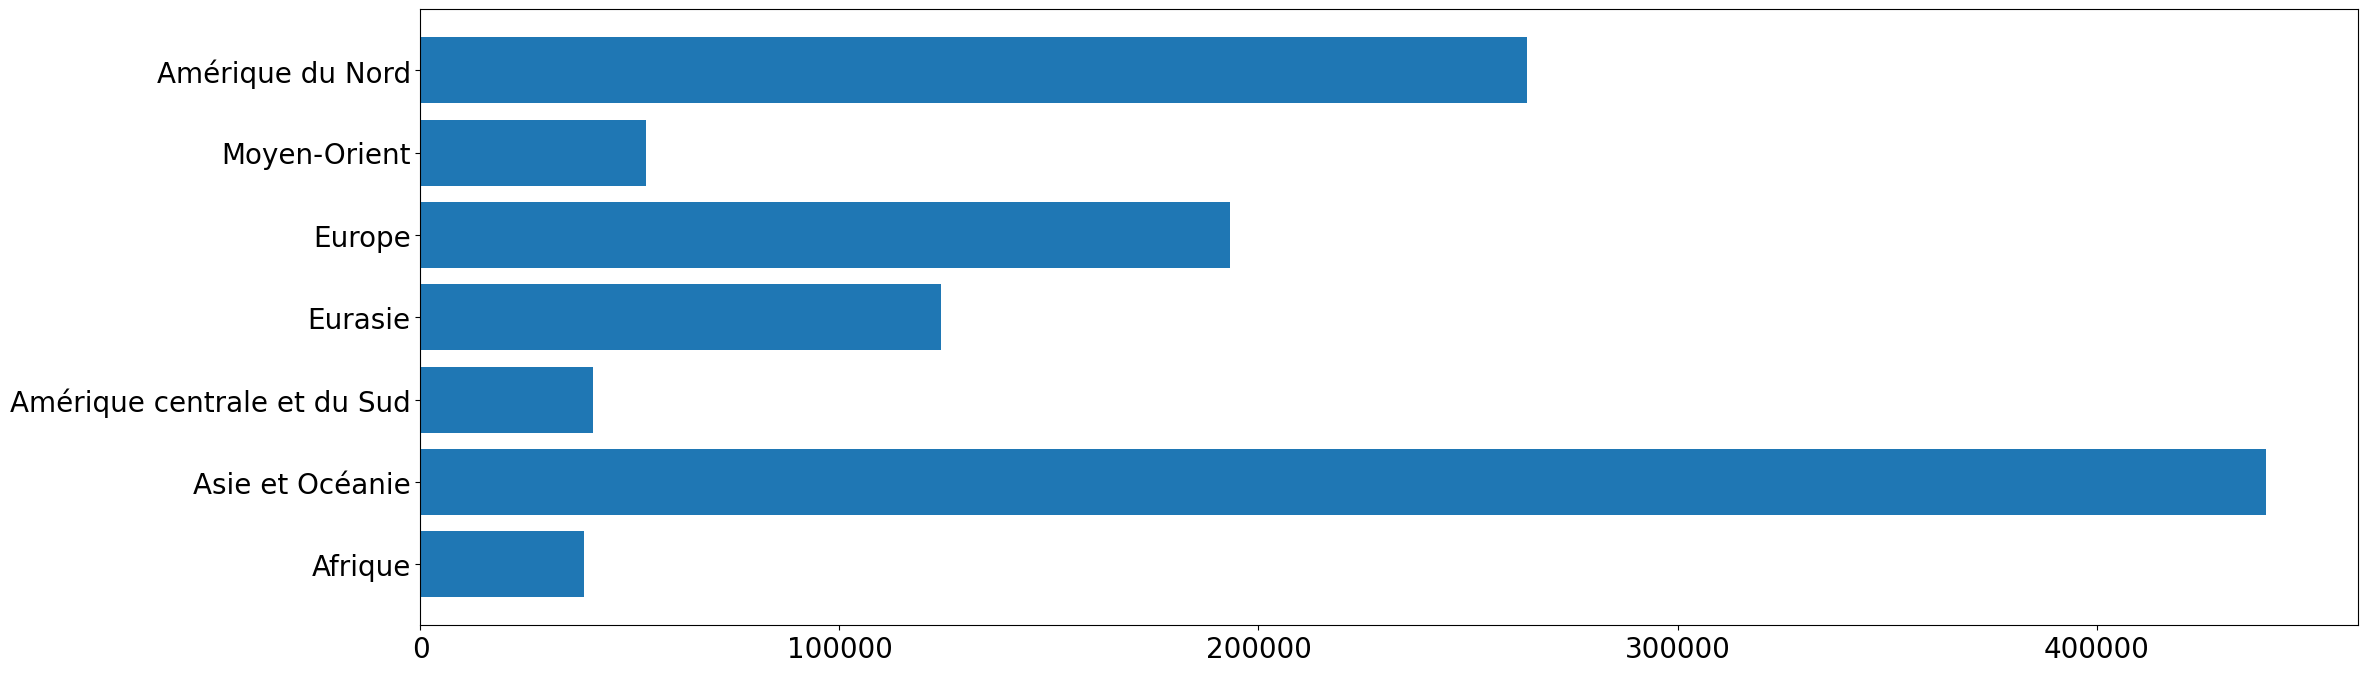

In [119]:
emissions_cumulative = data_emissions_total_pivot.aggregate("sum",axis=0)
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({(absolute/1000):.0f} GT)"

ax32 = plt.axes()
wedges, texts, autotexts = ax32.pie(emissions_cumulative.values, autopct=lambda pct: func(pct, emissions_cumulative.values),textprops=dict(color="k"))
#emissions_cumulative.plot(kind="pie",stacked=True)
plt.setp(autotexts, size=12, weight="bold")

#ax32.set_title("Émissions cumulatives depuis 1980")
ax32.legend(emissions_cumulative.index.to_list(),loc="upper right",fontsize=12,bbox_to_anchor=(1.25,1))
plt.show()
ax33 = plt.axes()
ax33.barh(emissions_cumulative.index.values,emissions_cumulative.values)
plt.show()

## Regardons les données de GES par habitant

On peut tirer la population d'un côté, les GES de l'autre et regarder l'évolution

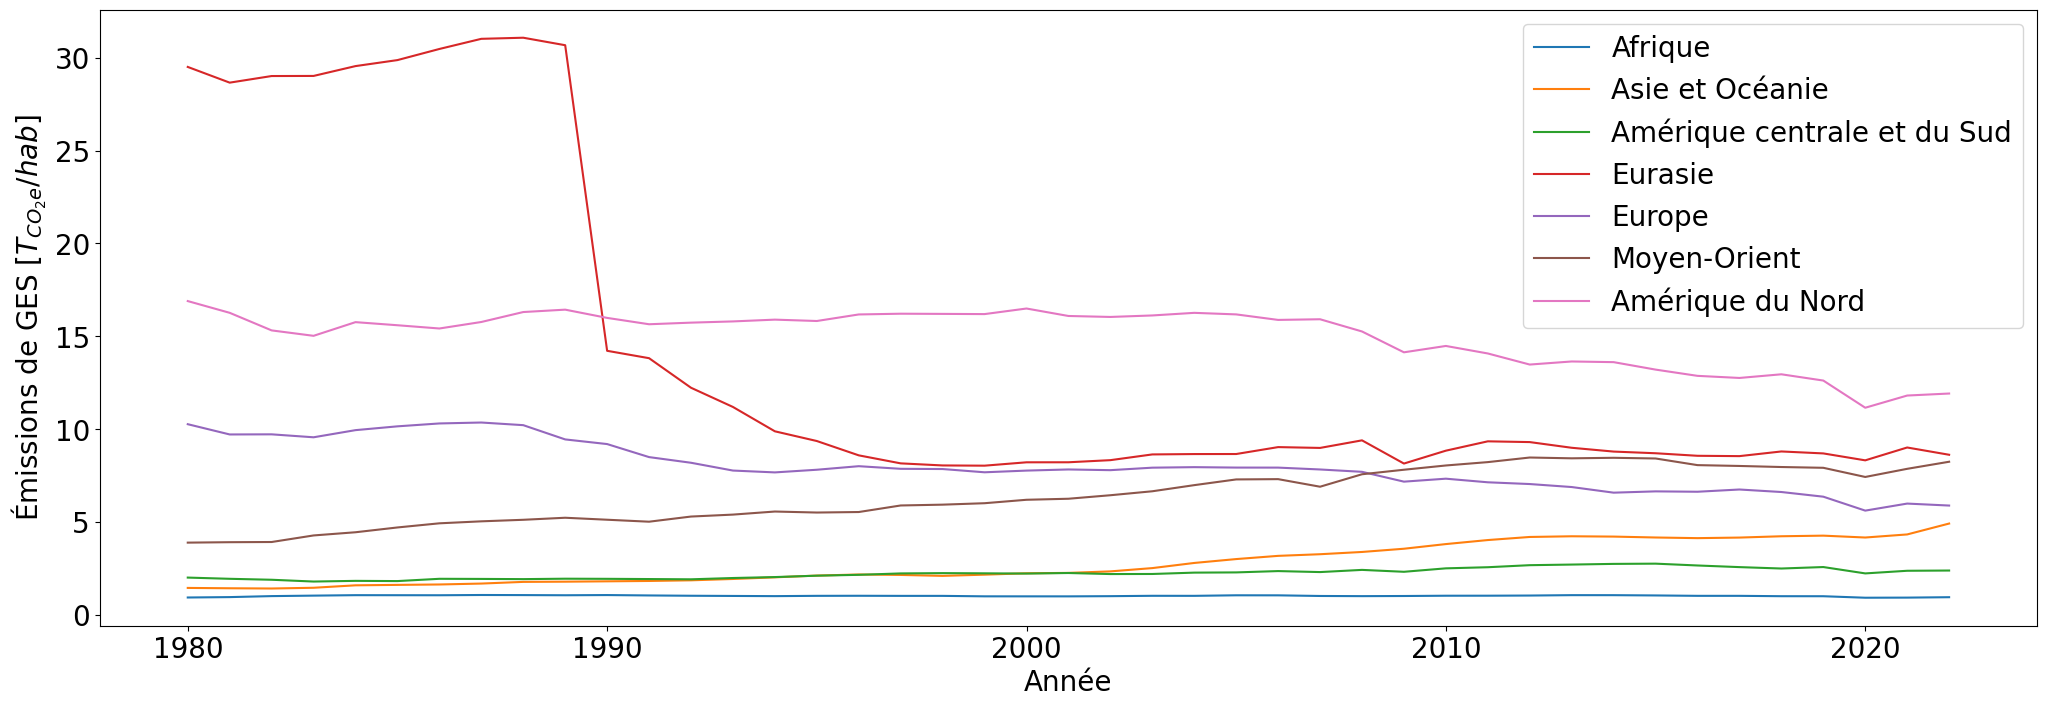

In [120]:
GES_per_capita = data_emissions_total_pivot * 1000000/population
#GES_per_capita.drop(columns="Eurasia",inplace=True)
ax34=GES_per_capita.plot(kind="line",xlabel="Année",ylabel="Émissions de GES [$T_{CO_2e}/hab$]")
ax34.legend(title="")

## Intensité des émissions
Les intensités d'émissions sont déjà calculées donc pourquoi ne pas commencer avec ces données là à la place juste pour regarder

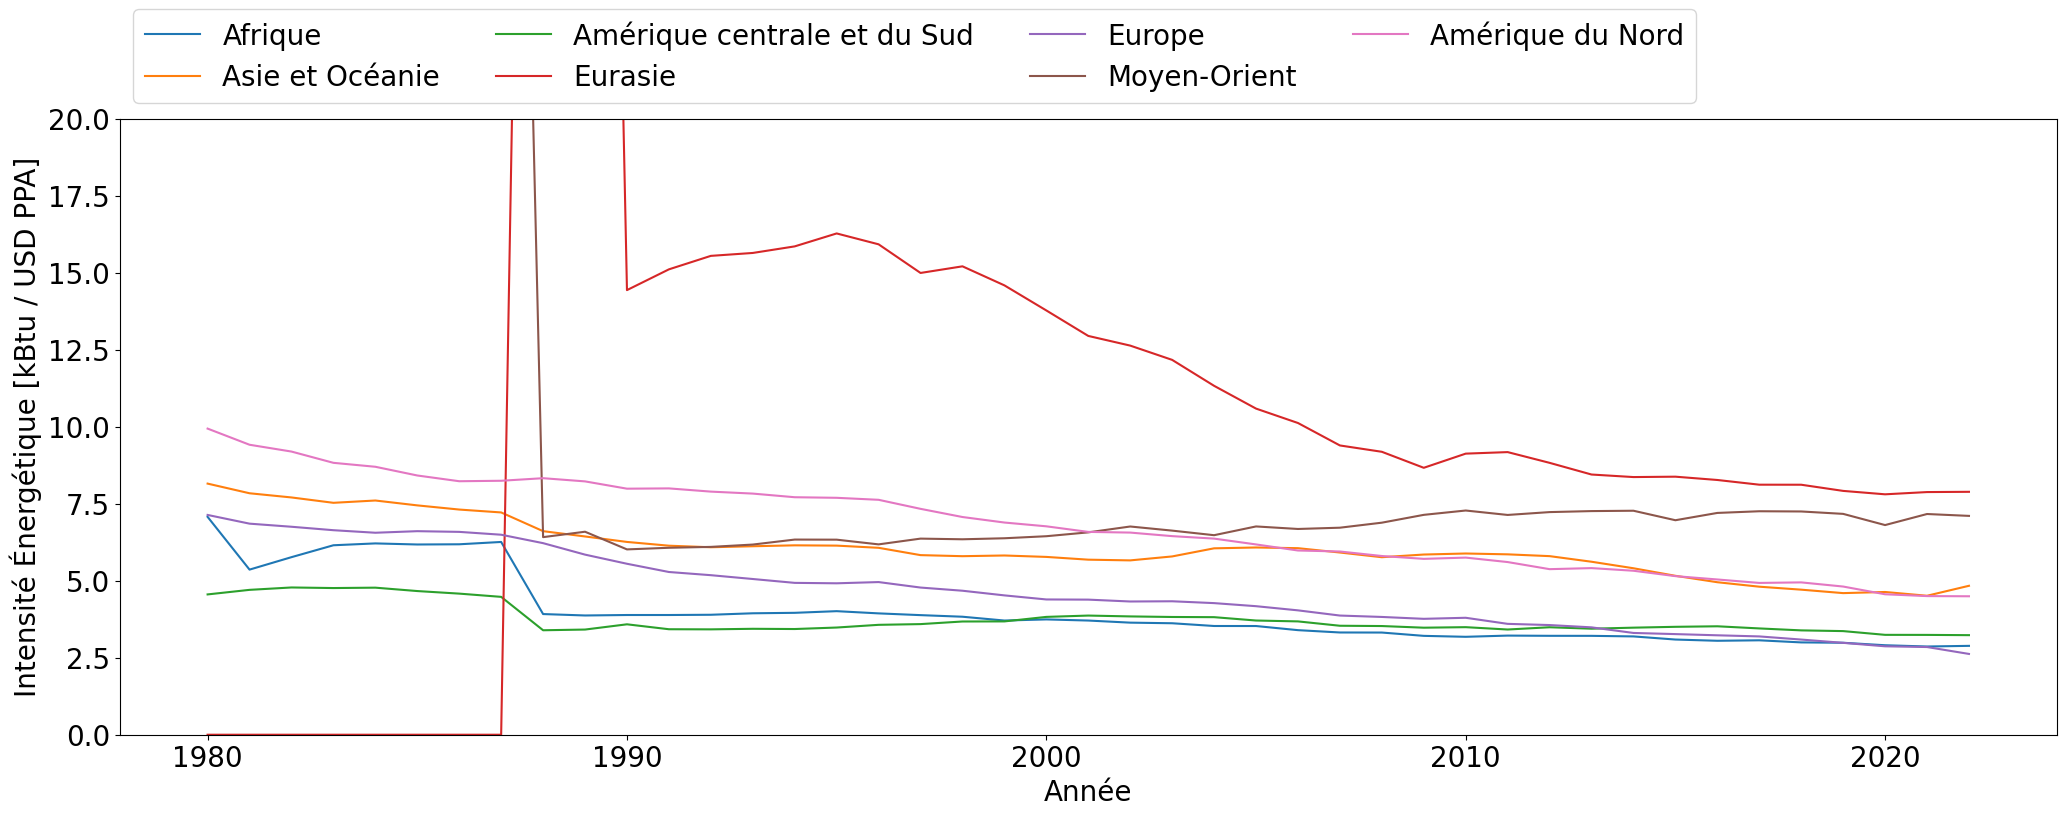

In [136]:
emissions_intensity  = api.get_data_by_id(["47"])
GDP_intensity = emissions_intensity.loc[emissions_intensity["activityName"]=="GDP"]
GDP_intensity_pivot = GDP_intensity.pivot(index="period",columns="countryRegionName",values="value")
GDP_intensity_pivot = GDP_intensity_pivot.rename(columns=country_dict_francais)
ax35=GDP_intensity_pivot.plot(kind="line",ylim=[0,20],xlabel="Année",ylabel="Intensité Énergétique [kBtu / USD PPA]")
ax35.legend(title="",ncols=4,loc="upper left",bbox_to_anchor=(0,1.2))
#GDP_productivity = 1.0/GDP_intensity
#GDP_productivity.plot(kind="line")
#GDP_intensity_pivot.plot(kind="line",ylim=[0,20])


Allons regarder l'intensité énergétique fournie par l'IEA. Commençons par l'énergie par personne

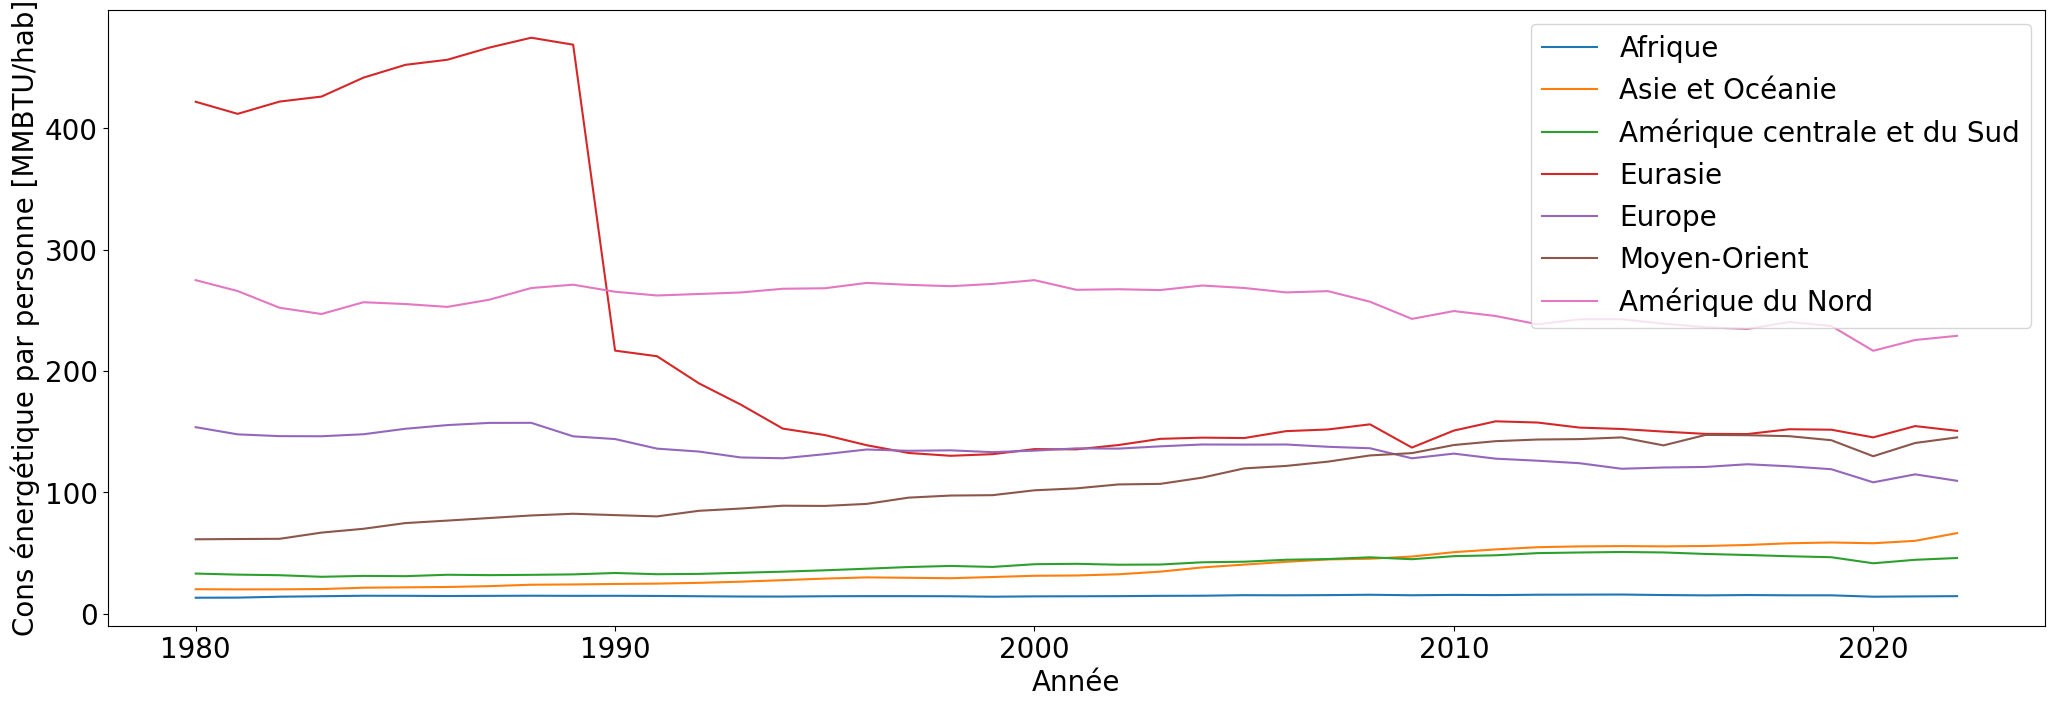

In [134]:
person_intensity = emissions_intensity.loc[emissions_intensity["activityName"]=="Population"]
person_intensity = person_intensity.sort_values(by=["countryRegionId","period"])
person_intensity_pivot = person_intensity.pivot(values="value",columns="countryRegionName",index="period")
person_intensity_pivot = person_intensity_pivot.rename(columns=country_dict_francais)
ax36=person_intensity_pivot.plot(kind="line",ylabel="Cons énergétique par personne [MMBTU/hab]",xlabel="Année")
ax36.legend(title="")


Et maintenant une petite validation

<Axes: xlabel='period'>

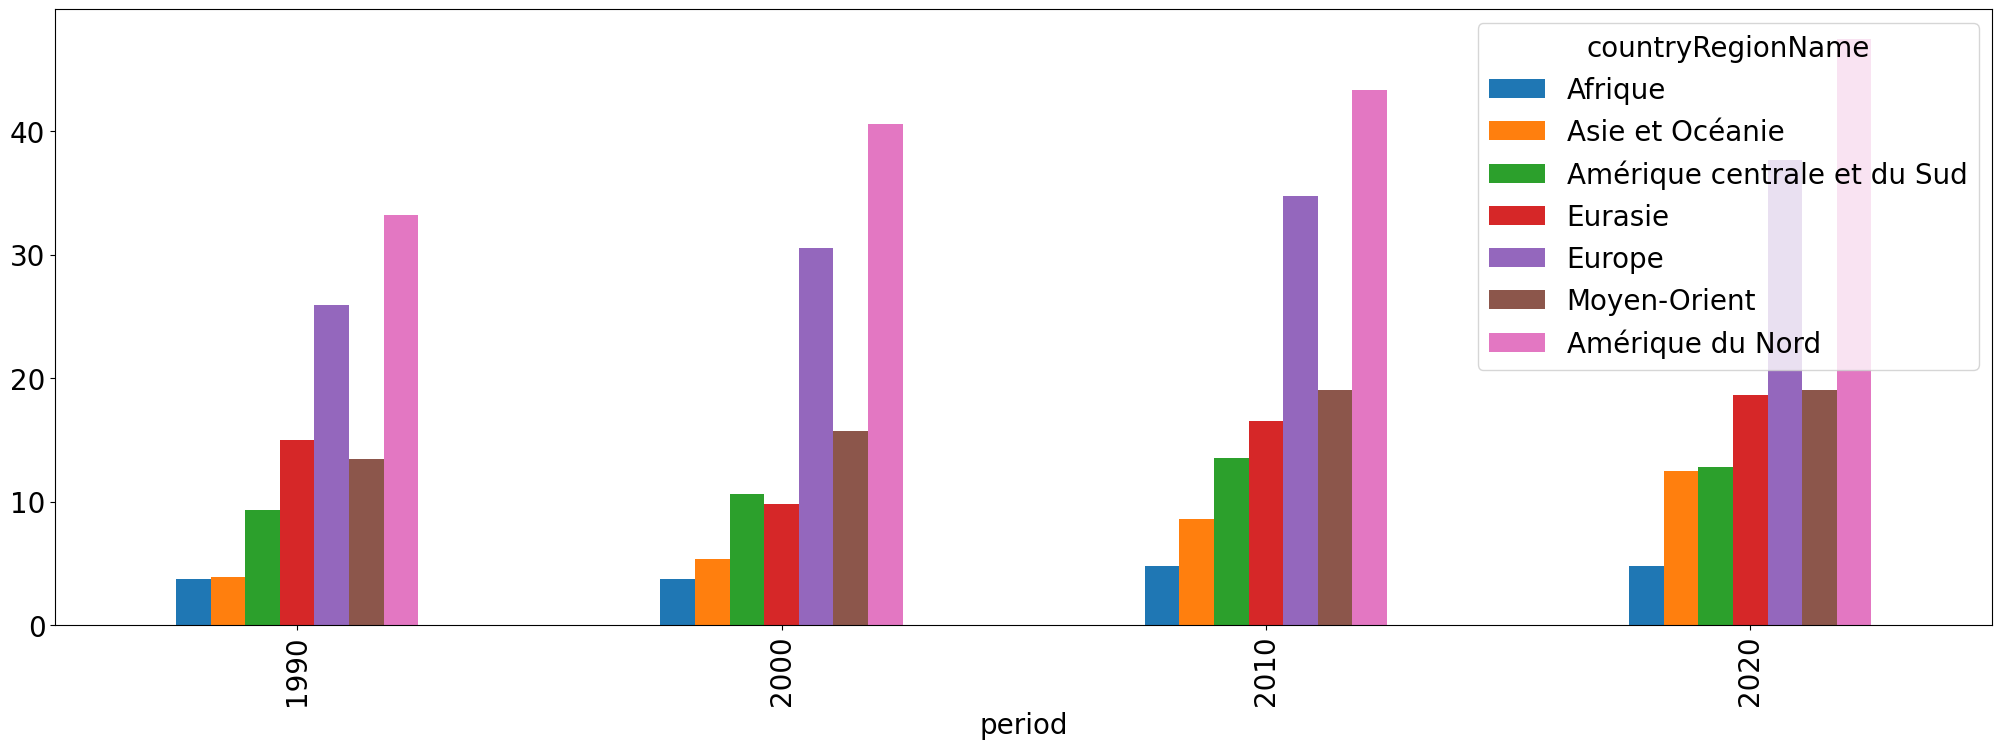

In [135]:

person_intensity_1990 = person_intensity_pivot.loc[person_intensity_pivot.index>=1990]
dollar_intensity_1990 = GDP_intensity_pivot.loc[GDP_intensity_pivot.index>=1990]

GDP_back_calc = person_intensity_1990/dollar_intensity_1990
GDP_back_calc_plot = GDP_back_calc.loc[GDP_back_calc.index.isin(bar_plot_year_list)]
GDP_back_calc_plot.plot(kind="bar")

## Génération d'électricité

Exploration des données de capacité de génération d'électricité dans le monde. On commence par une visualisation de la distribution de type de génération par type de carburant

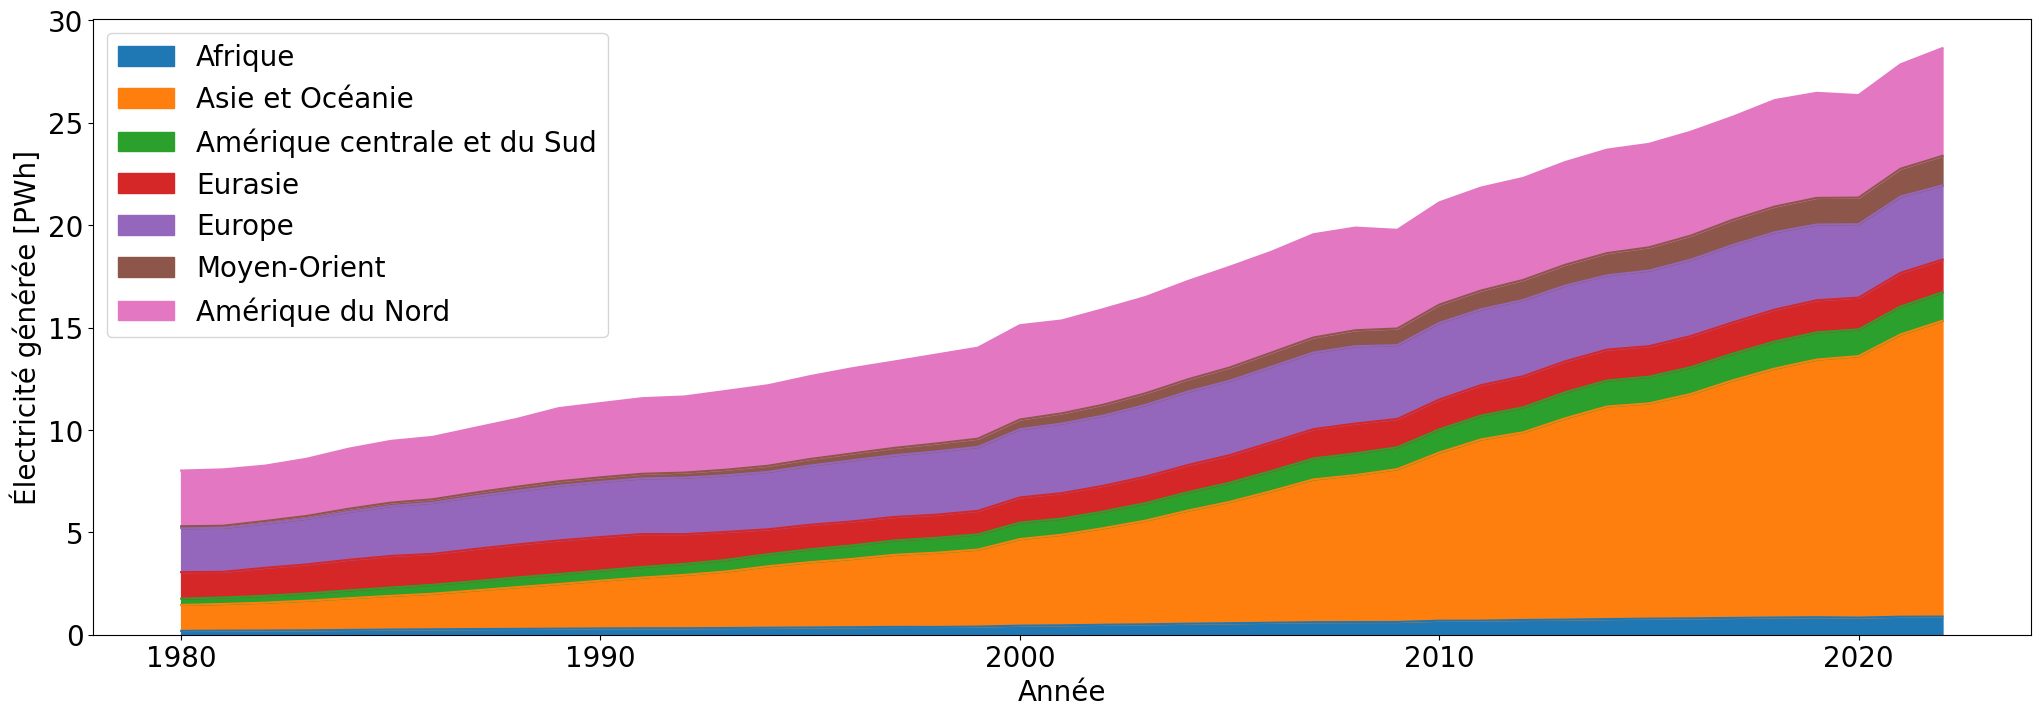

In [130]:
electricity_generation_world = api.get_data_by_id(["2"],unit="BKWH",activities="12",regions=region_list_by_region)
electricity_generation_world["value"] = electricity_generation_world["value"]/1000
electricity_generation_world.sort_values(by=["countryRegionName","period"])
electricity_generation_world = electricity_generation_world.pivot(columns="countryRegionName",index="period",values="value")
electricity_generation_world = electricity_generation_world.rename(columns=country_dict_francais)
ax40=electricity_generation_world.plot(kind="area",xlabel="Année",ylabel="Électricité générée [PWh]")
ax40.legend(title="")


Explorons la production totale par carburant

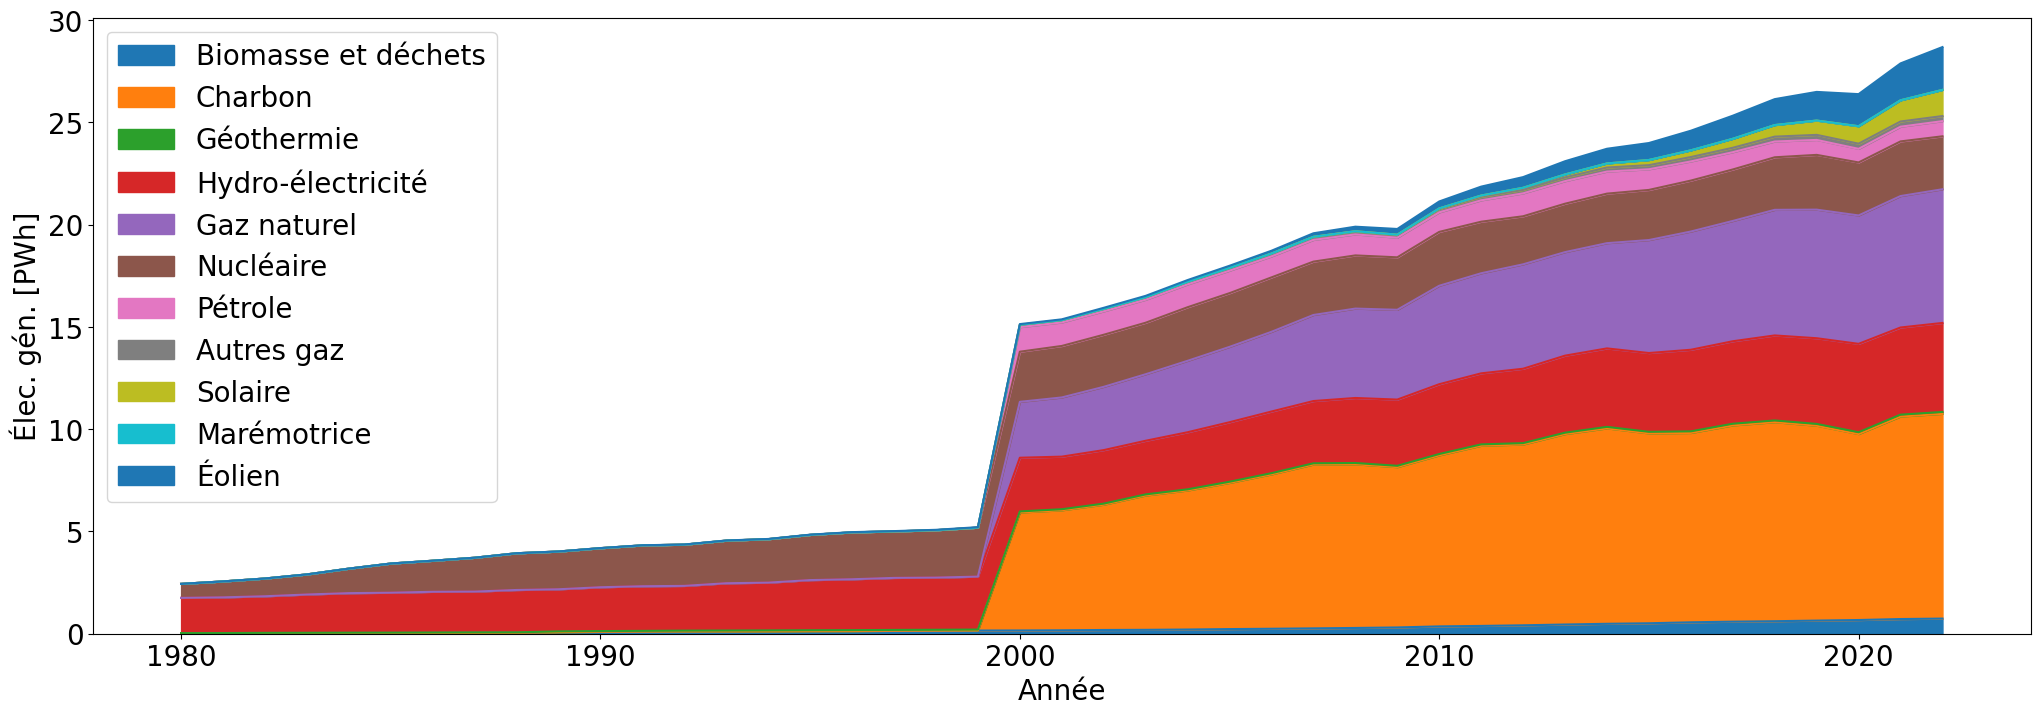

In [132]:
global_electricity_generation_by_fuel = api.get_data_by_id(["116","117","27","2890","30","31","32","33","35","37","38"],unit="BKWH",activities="12",regions=region_list_global)
global_electricity_generation_by_fuel["value"] = global_electricity_generation_by_fuel["value"]/1000
global_electricity_generation_by_fuel.sort_values(by=["productName","period"])
column_dict_electricity = {"Coal":"Charbon","Geothermal":"Géothermie","Hydroelectricity":"Hydro-électricité","Natural gas":"Gaz naturel","Nuclear":"Nucléaire","Oil":"Pétrole","Other gases":"Autres gaz","Solar":"Solaire","Tide and wave":"Marémotrice","Wind":"Éolien","Biomass and waste":"Biomasse et déchets"}
global_electricity_generation_by_fuel = global_electricity_generation_by_fuel.pivot(columns="productName",index="period",values="value")
global_electricity_generation_by_fuel = global_electricity_generation_by_fuel.rename(columns=column_dict_electricity)
ax60= global_electricity_generation_by_fuel.plot(kind="area",xlabel="Année",ylabel="Élec. gén. [PWh]")
ax60.legend(title="")

Allons regarder la distribution géographique de la génération par continent

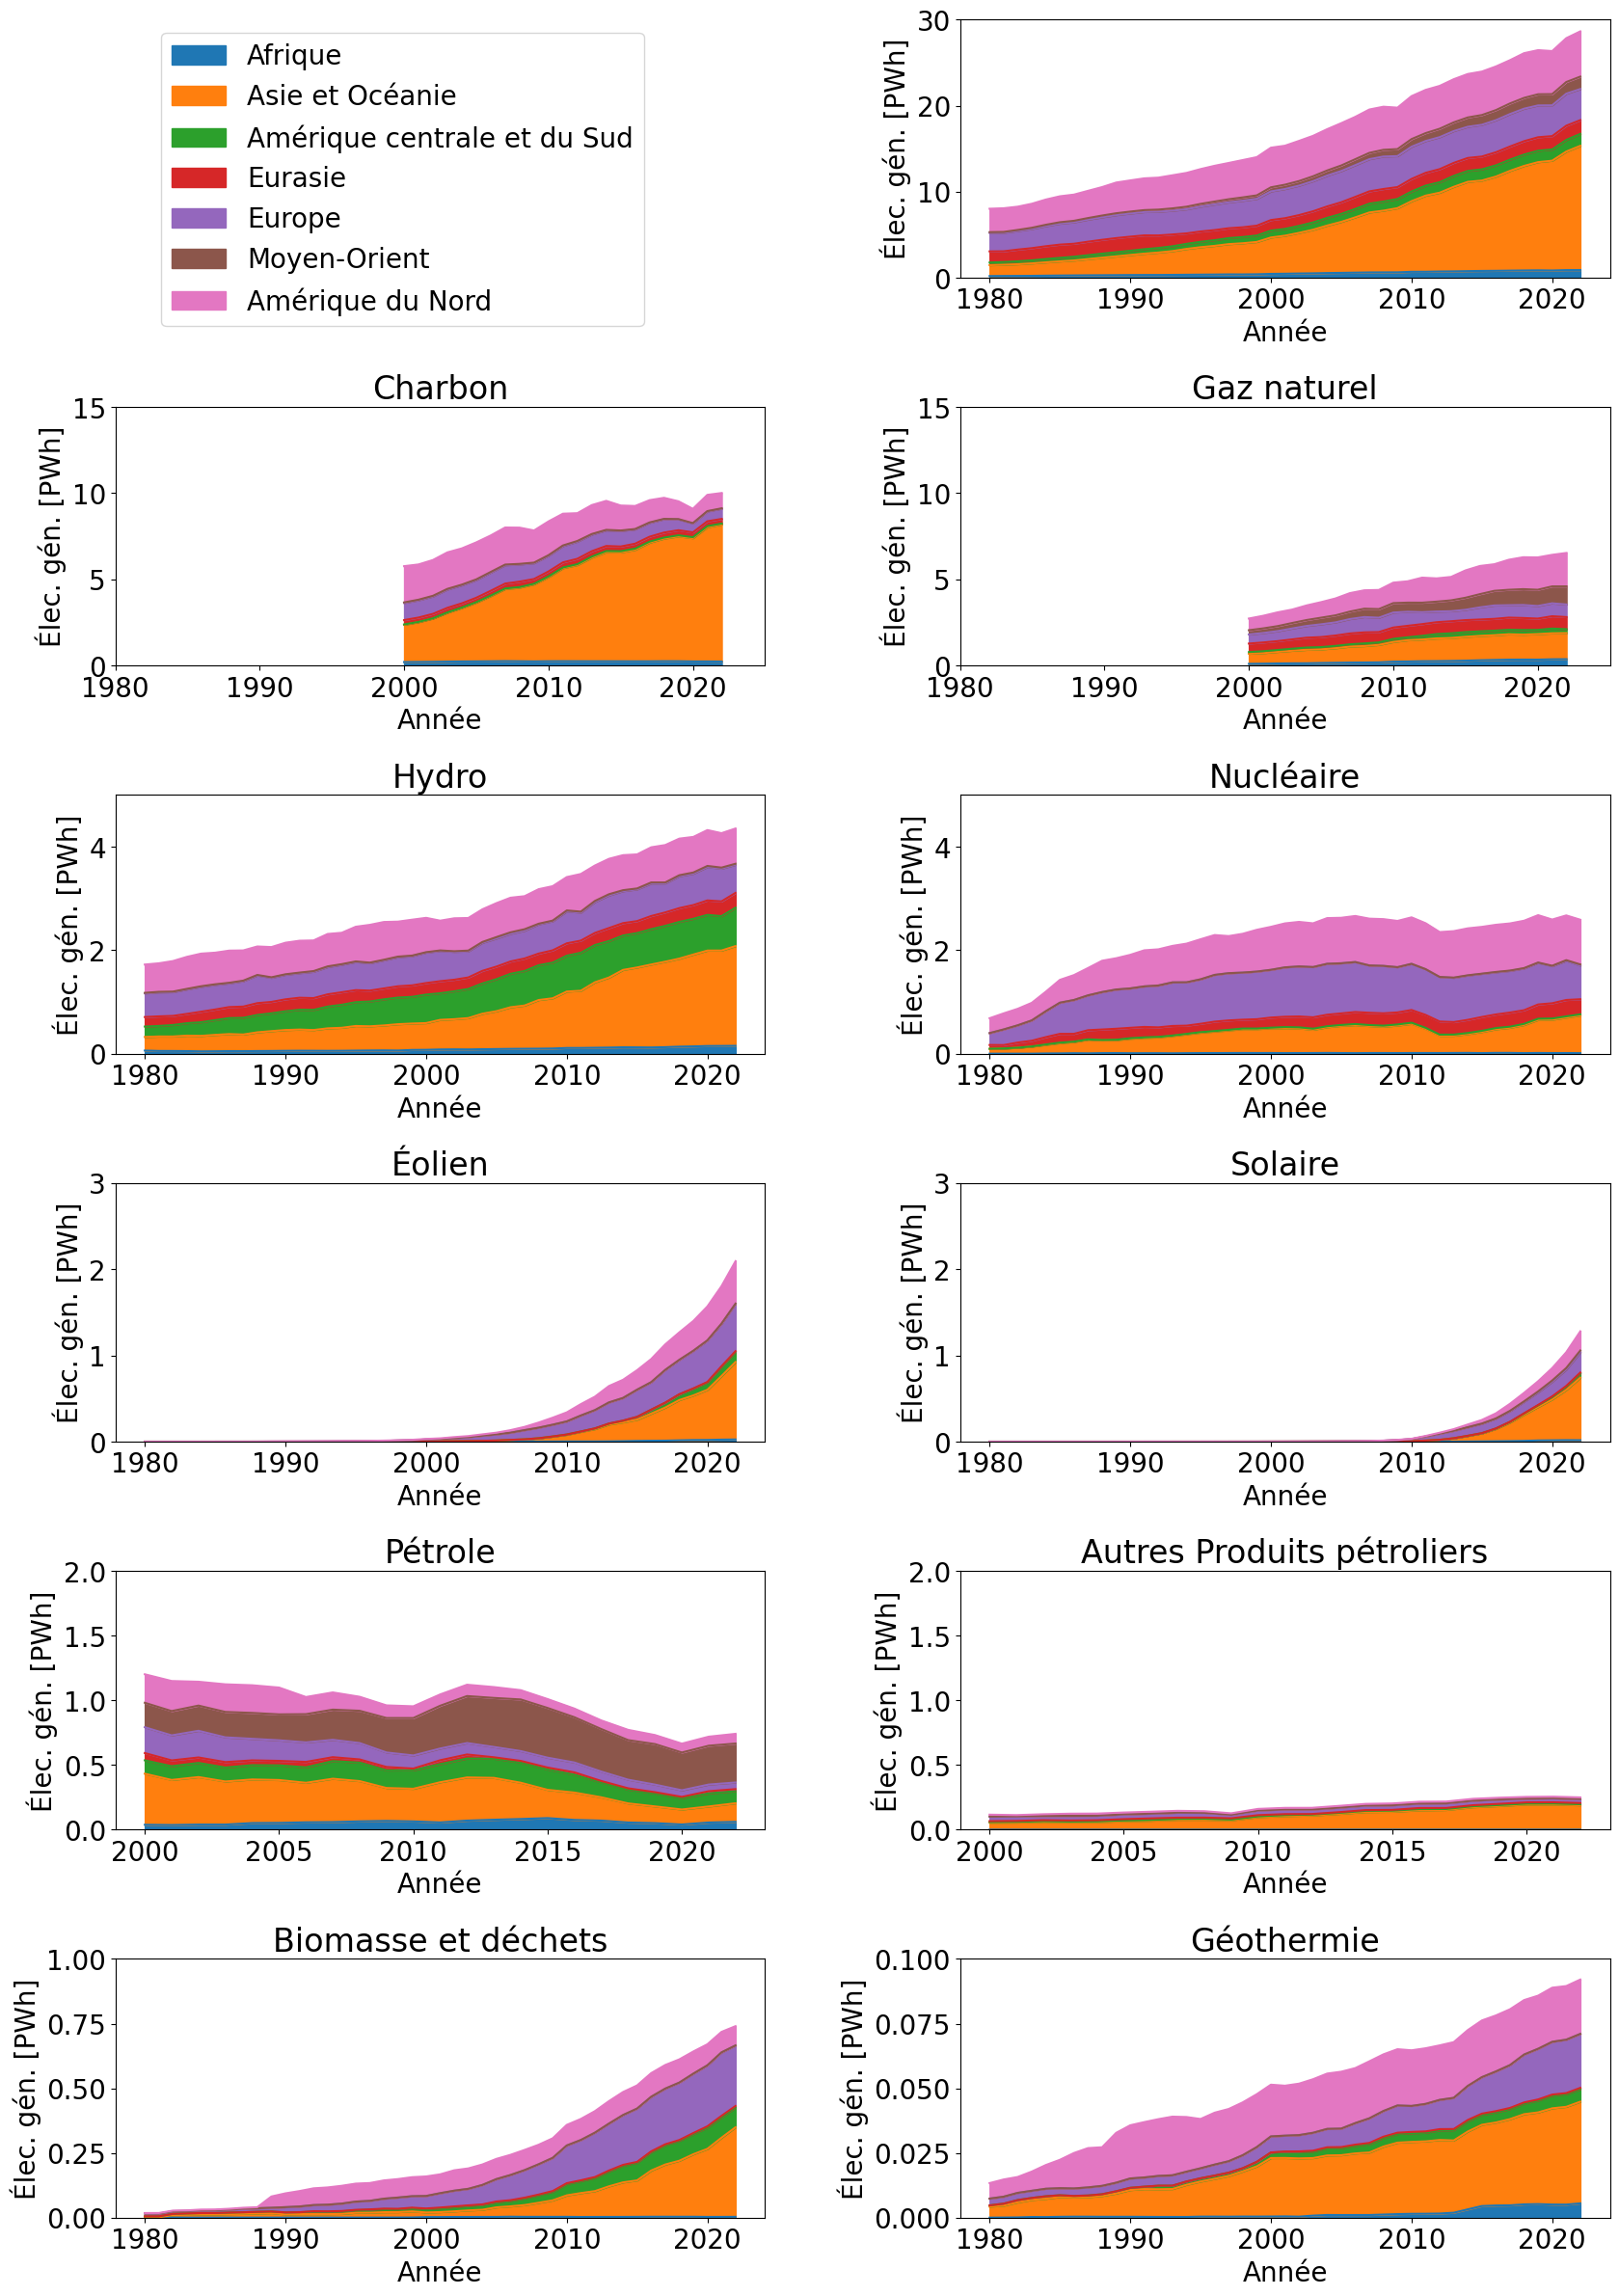

In [133]:
fig_elec_continent = plt.figure(figsize=[20,20])
ax41 = plt.subplot(6,2,2)
electricity_generation_world.plot(kind="area",xlabel="Année",ylabel="Élec. gén. [PWh]",ax=ax41)
plt.legend(title="",loc="upper left",bbox_to_anchor = (-1.25,1))
electricity_generation  = api.get_data_by_id(["2","116","117","27","2890","30","31","32","33","35","37","38"],unit="BKWH",activities="12")
electricity_generation["value"] =electricity_generation["value"]/1000
# CHarbon
ax42=plt.subplot(6,2,3)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Coal"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax42,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Charbon",ylim=[0,15],xlim=[1980,2025])
ax42.get_legend().remove()
# GN
ax43=plt.subplot(6,2,4)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Natural gas"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax43,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Gaz naturel",ylim=[0,15],xlim=[1980,2025])
ax43.get_legend().remove()
#Pétrole
ax44=plt.subplot(6,2,9)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Oil"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax44,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Pétrole",ylim=[0,2])
ax44.get_legend().remove()
#Hydro
ax45=plt.subplot(6,2,5)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Hydroelectricity"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax45,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Hydro",ylim=[0,5])
ax45.get_legend().remove()
# Géothermie
ax46=plt.subplot(6,2,12)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Geothermal"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax46,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Géothermie",ylim=[0,0.1])
ax46.get_legend().remove()

# Éolien
ax47=plt.subplot(6,2,7)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Wind"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax47,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Éolien",ylim=[0,3])
ax47.get_legend().remove()

# Nucléaire
ax48=plt.subplot(6,2,6)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Nuclear"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax48,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Nucléaire",ylim=[0,5])
ax48.get_legend().remove()

# Solaire
ax49=plt.subplot(6,2,8)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Solar"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax49,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Solaire",ylim=[0,3])
ax49.get_legend().remove()
# Biomasse
ax50=plt.subplot(6,2,11)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Biomass and waste"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax50,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Biomasse et déchets",ylim=[0,1])
ax50.get_legend().remove()
# Autres produits pétroliers
ax51=plt.subplot(6,2,10)
coal_gen = electricity_generation.loc[electricity_generation["productName"]=="Other gases"]
coal_gen = coal_gen.pivot(columns="countryRegionName",index="period",values="value")
coal_gen.plot(kind="area",ax=ax51,xlabel="Année",ylabel="Élec. gén. [PWh]",title="Autres Produits pétroliers",ylim=[0,2])
ax51.get_legend().remove()
#electricity_generation = electricity_information.loc[electricity_information["activityName"]=="Generation"]
#electricity_generation = electricity_generation.sort_values(by=["productName","countryRegionName","period"],ascending=True)
#plot_by_region_and_type(electricity_generation,kind="area",region_dict=country_dict_francais)
#electricity_generation = electricity_generation.pivot(index="period",columns="countryRegionName",values="value")
#electricity_generation = electricity_generation.rename(columns=country_dict_francais)

#electricity_capacity = electricity_information.loc[electricity_information["activityName"]=="Capacity"]
fig_elec_continent.subplots_adjust(wspace=0.3, hspace=0.5,top=1.25)